In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [35]:
import seaborn as sns
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import ipdb
import time

In [59]:
num_paths=100

trajectories_file = "/home/richard/improbable/rlkit-relational/scripts/data/trajectories05_17_2020-02_51_34_.881761.hdf5"
f = h5py.File(trajectories_file, 'r')

if "image_obs" in f:
    print("Loading images...")
    image_obs = np.array(f.get('image_obs')[:num_paths])
attn = np.array(f.get('attn')[:num_paths])
# logpi=np.array(f.get('logpi')[:num_paths])
# logstd=np.array(f.get('logstd')[:num_paths])
# logstd_block2=np.array(f.get('logstd_block2')[:num_paths])

# logpi_block2=np.array(f.get('logpi_block2')[:num_paths])

# logpi_inverteddir=np.array(f.get('logpi_inverteddir')[:num_paths])

# rewards = np.array(f.get('rewards')[:num_paths])
# qvalues = np.array(f.get('qvalues')[:num_paths])
# qvalues_invertedgrip = np.array(f.get('qvalues_invertedgrip')[:num_paths])
# qvalues_inverteddir = np.array(f.get('qvalues_inverteddir')[:num_paths])


actions = np.array(f.get('actions')[:num_paths])
obs = np.array(f.get('obs')[:num_paths])

f.close()
actions.shape
np.set_printoptions(precision=2, formatter={'float_kind':'{:f}'.format})
print(actions.shape)

Loading images...
(20, 150, 4)


In [60]:
image_obs

array([[[[[115, 219, 145],
          [115, 219, 145],
          [115, 219, 145],
          ...,
          [115, 219, 145],
          [115, 219, 145],
          [115, 219, 145]],

         [[115, 219, 145],
          [115, 219, 145],
          [115, 219, 145],
          ...,
          [115, 219, 145],
          [115, 219, 145],
          [115, 219, 145]],

         [[115, 219, 145],
          [115, 219, 145],
          [115, 219, 145],
          ...,
          [115, 219, 145],
          [115, 219, 145],
          [115, 219, 145]],

         ...,

         [[ 67,  67,  67],
          [ 67,  67,  67],
          [ 67,  67,  67],
          ...,
          [116, 220, 146],
          [116, 220, 146],
          [116, 220, 146]],

         [[ 67,  67,  67],
          [ 67,  67,  67],
          [ 67,  67,  67],
          ...,
          [116, 220, 146],
          [116, 220, 146],
          [116, 220, 146]],

         [[ 67,  67,  67],
          [ 67,  67,  67],
          [ 67,  67,  67],
         

In [61]:
actions[:,:,:2].shape
from mpl_toolkits.mplot3d import Axes3D

In [62]:
# import torch
# torch.distributions.uniform.Uniform(torch.tensor(), torch.tensor())

In [63]:
import matplotlib
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

Step start 0


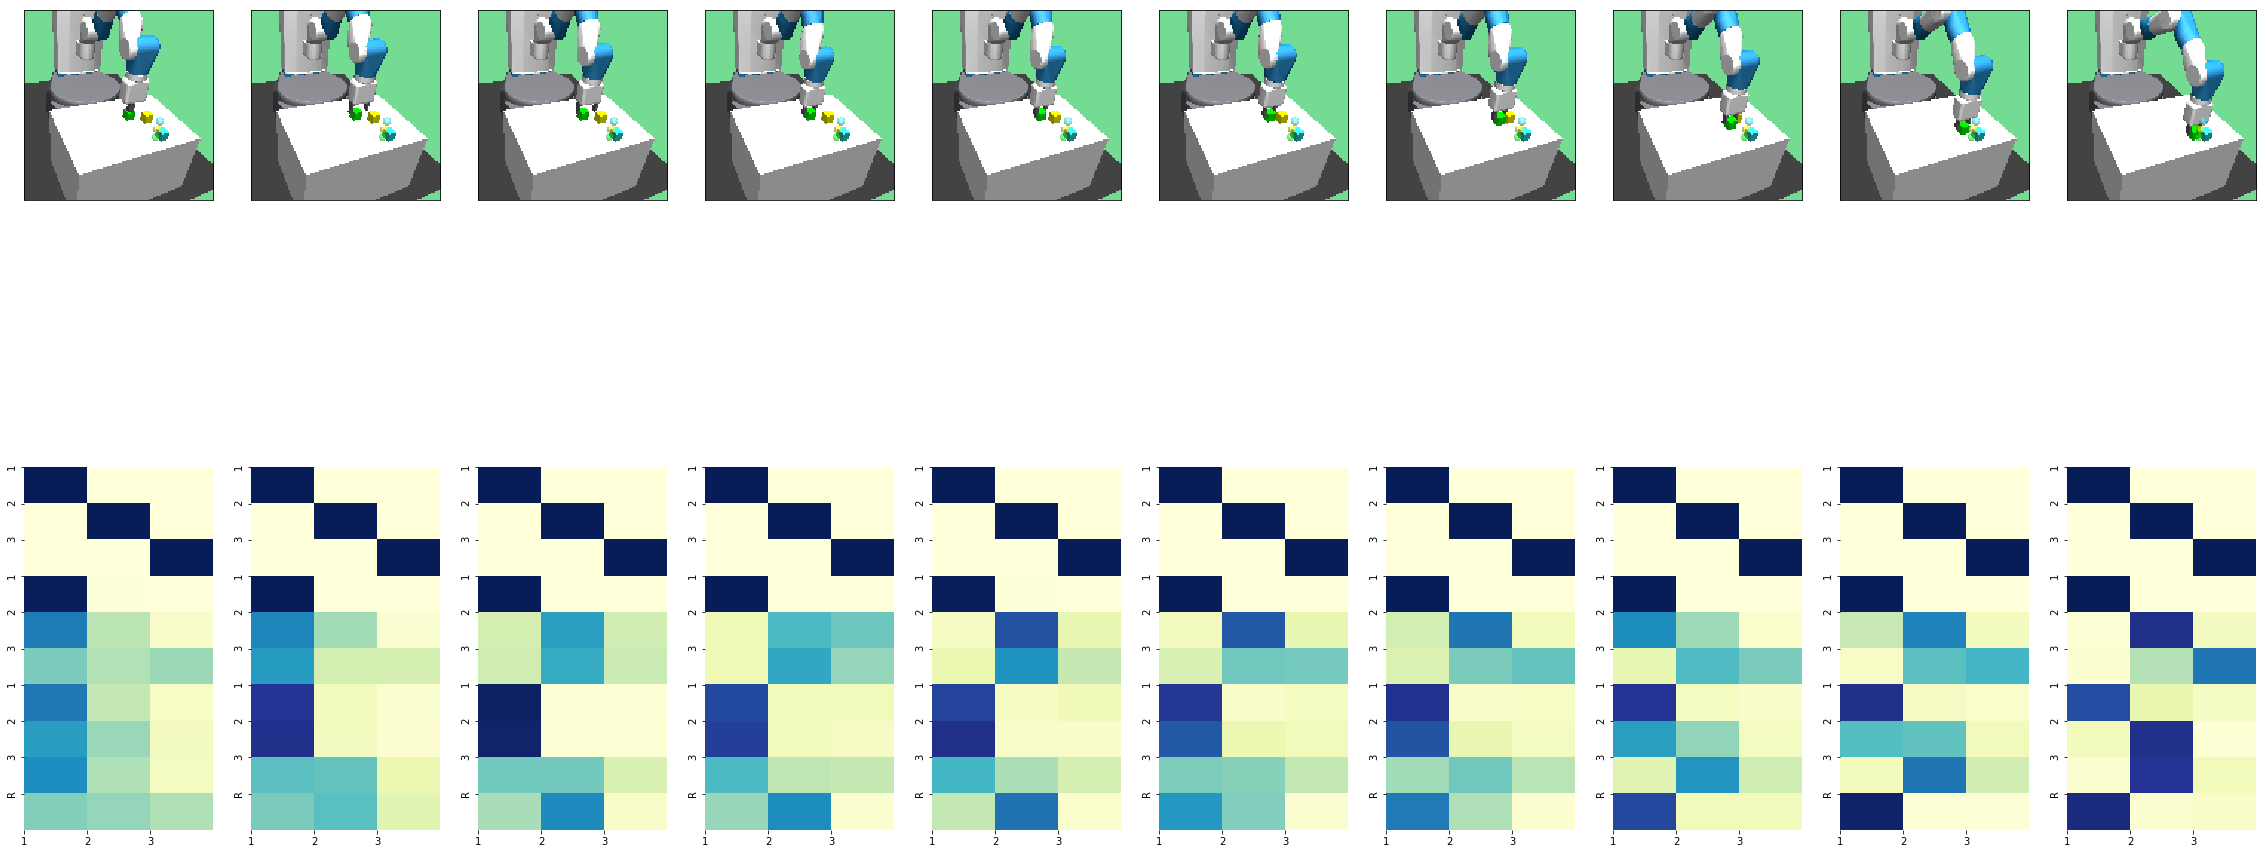

Step start 1


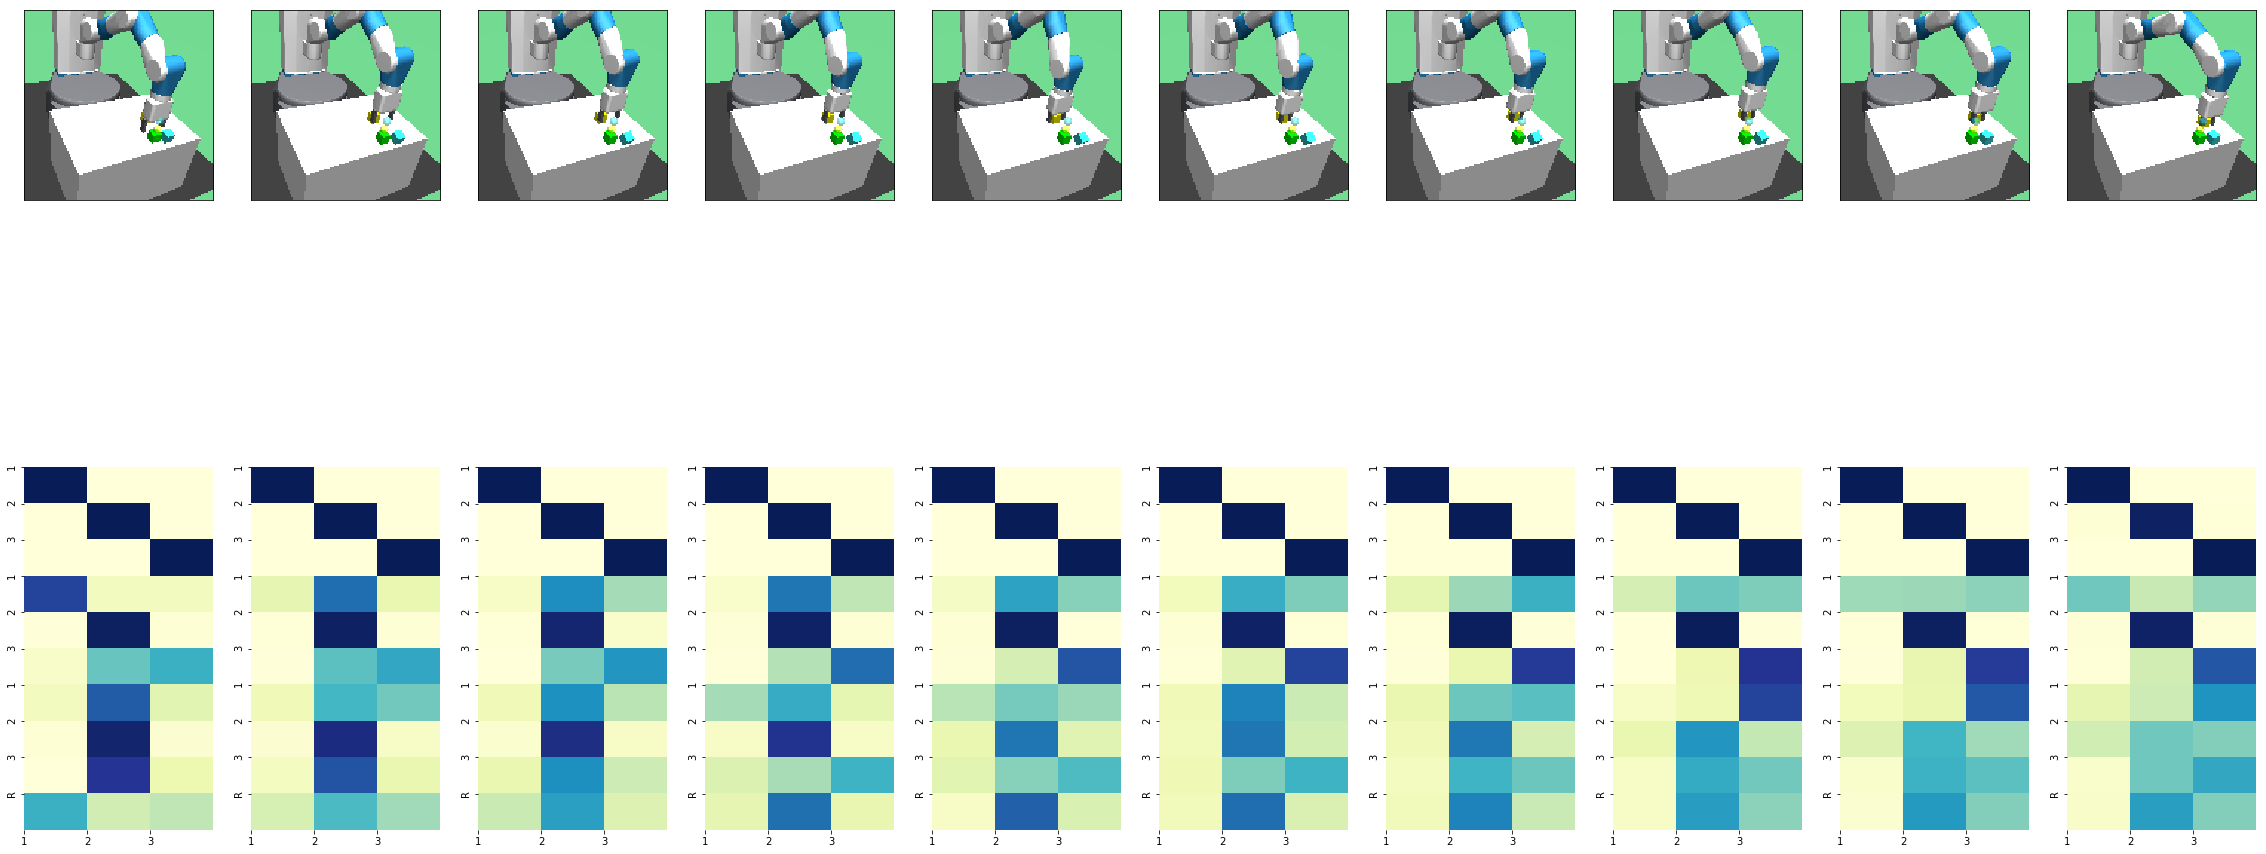

Step start 2


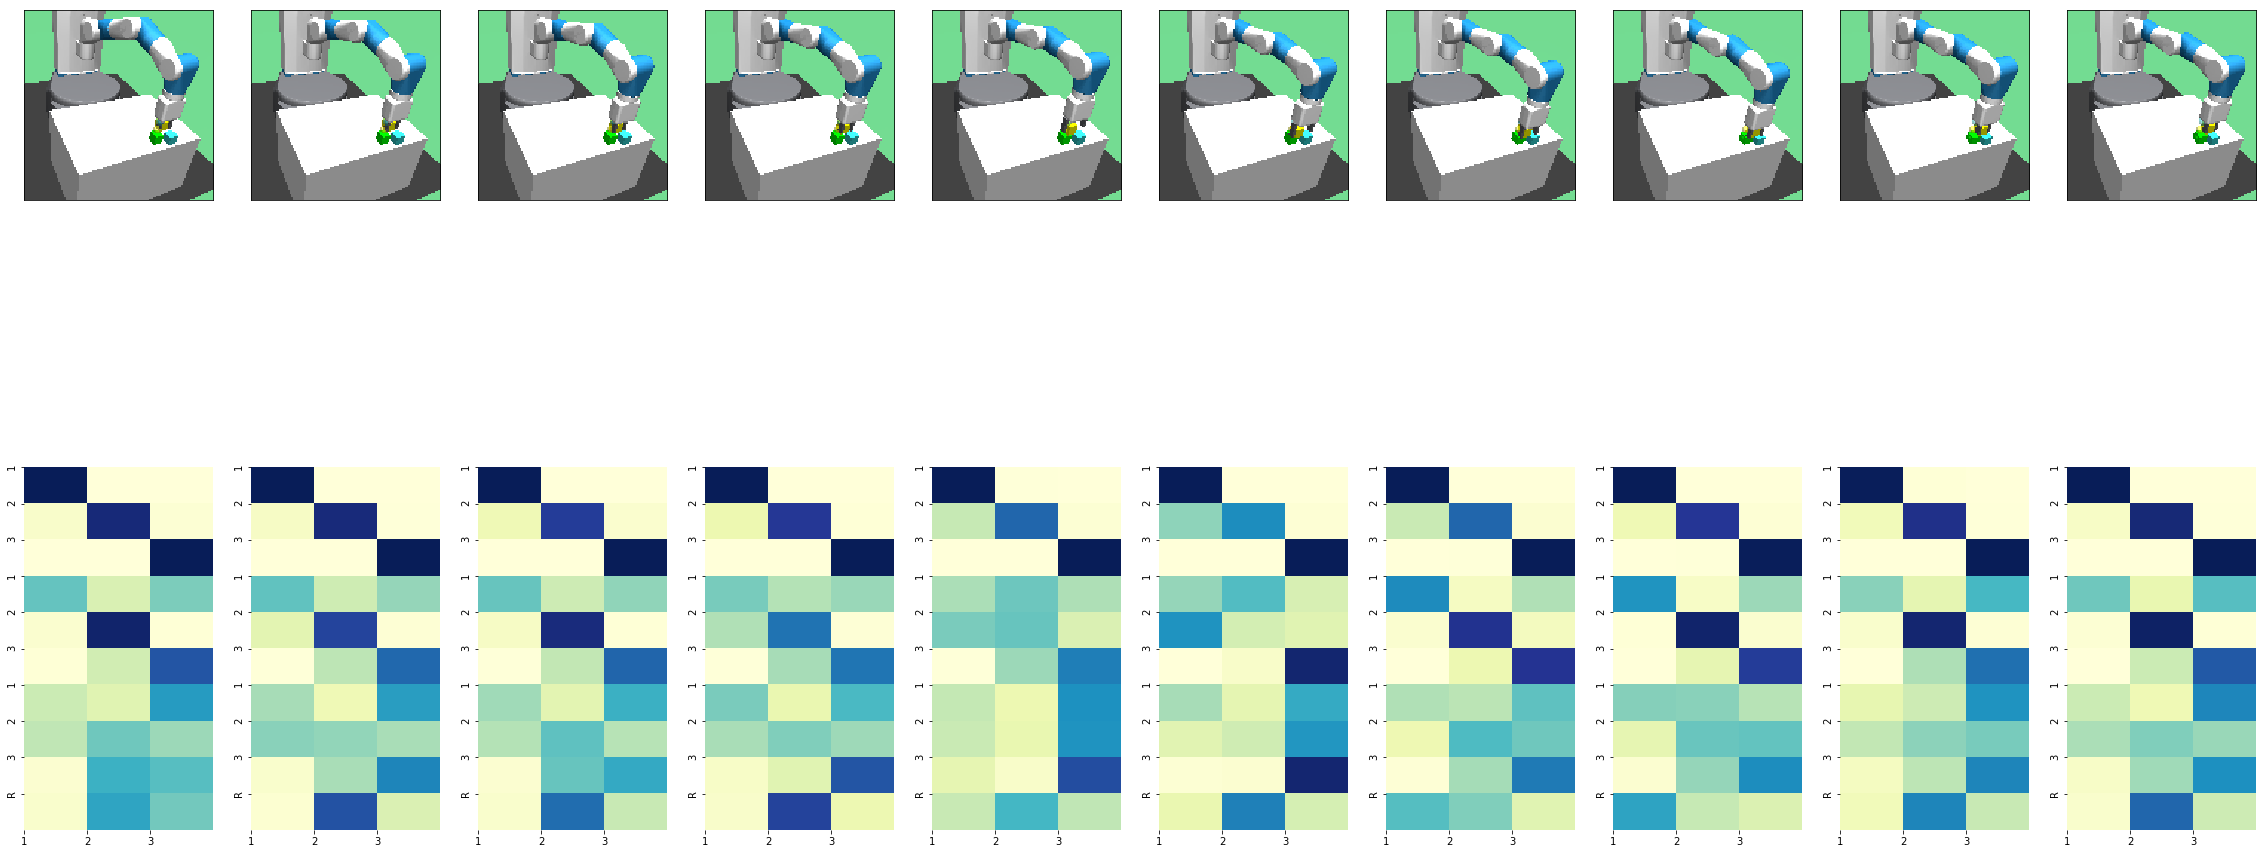

Step start 3


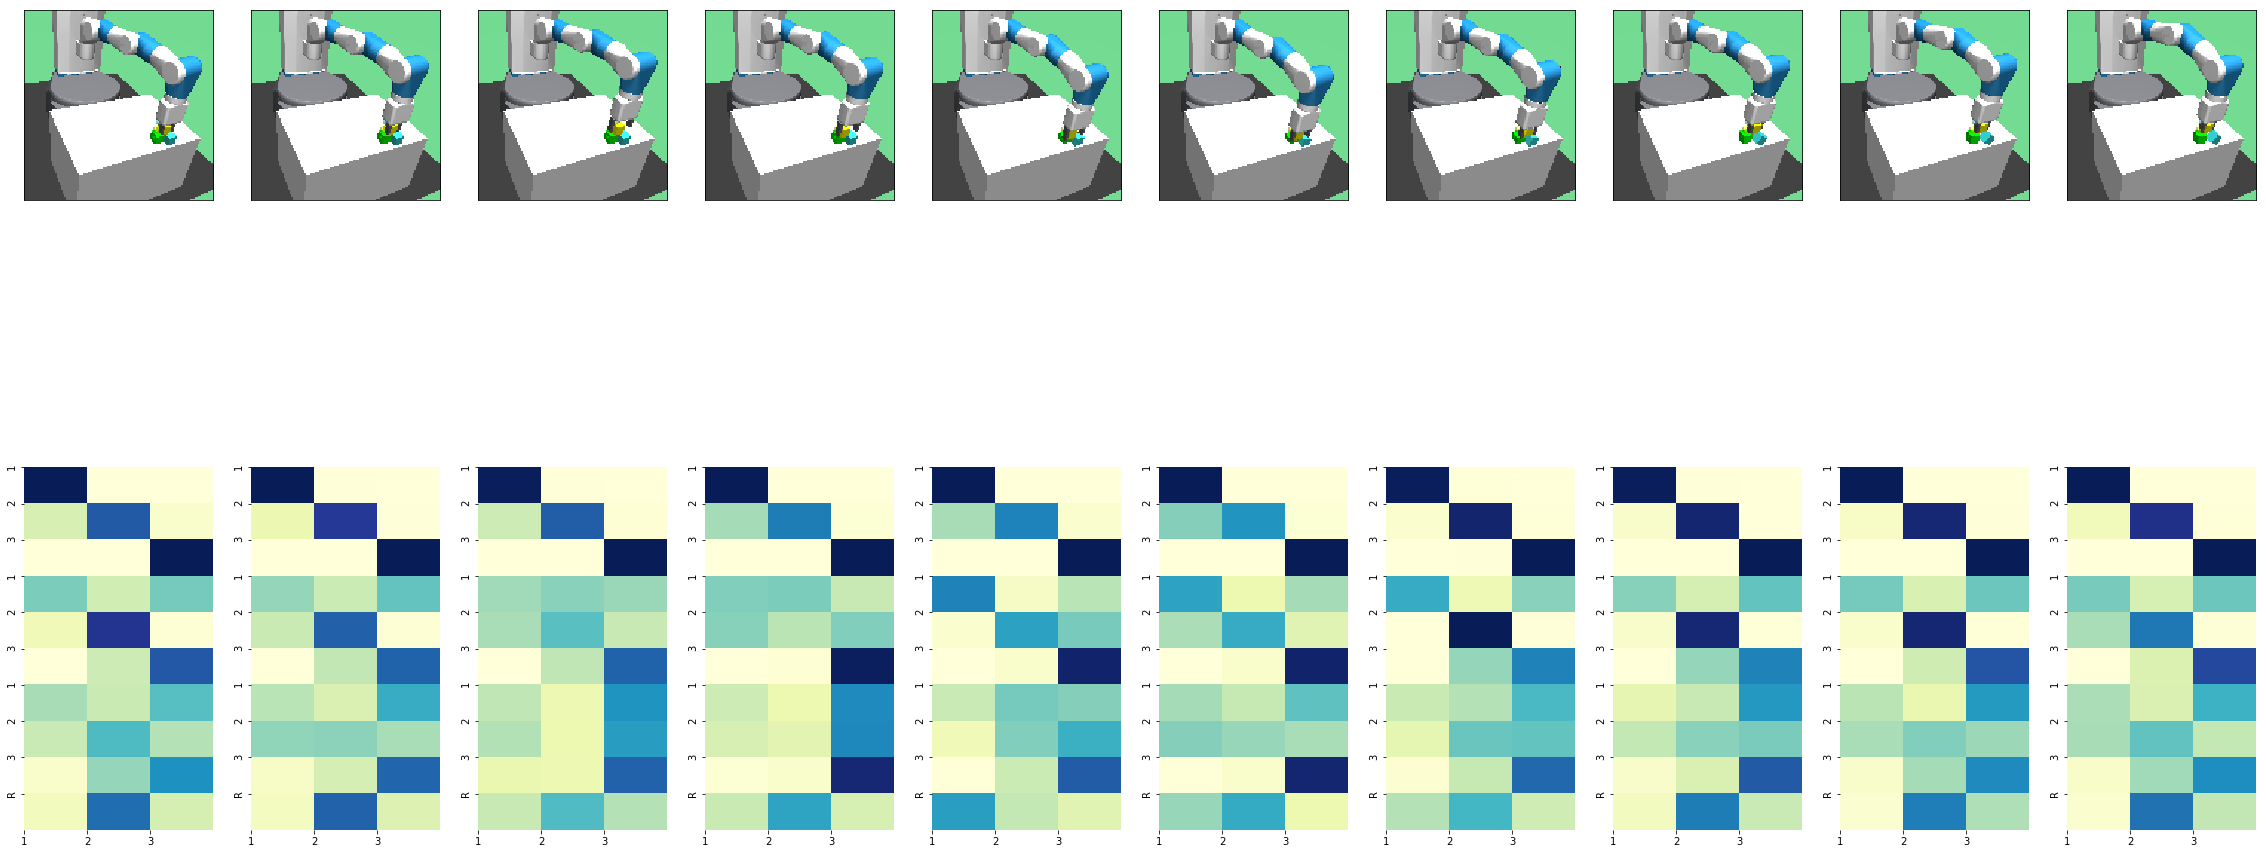

Step start 4


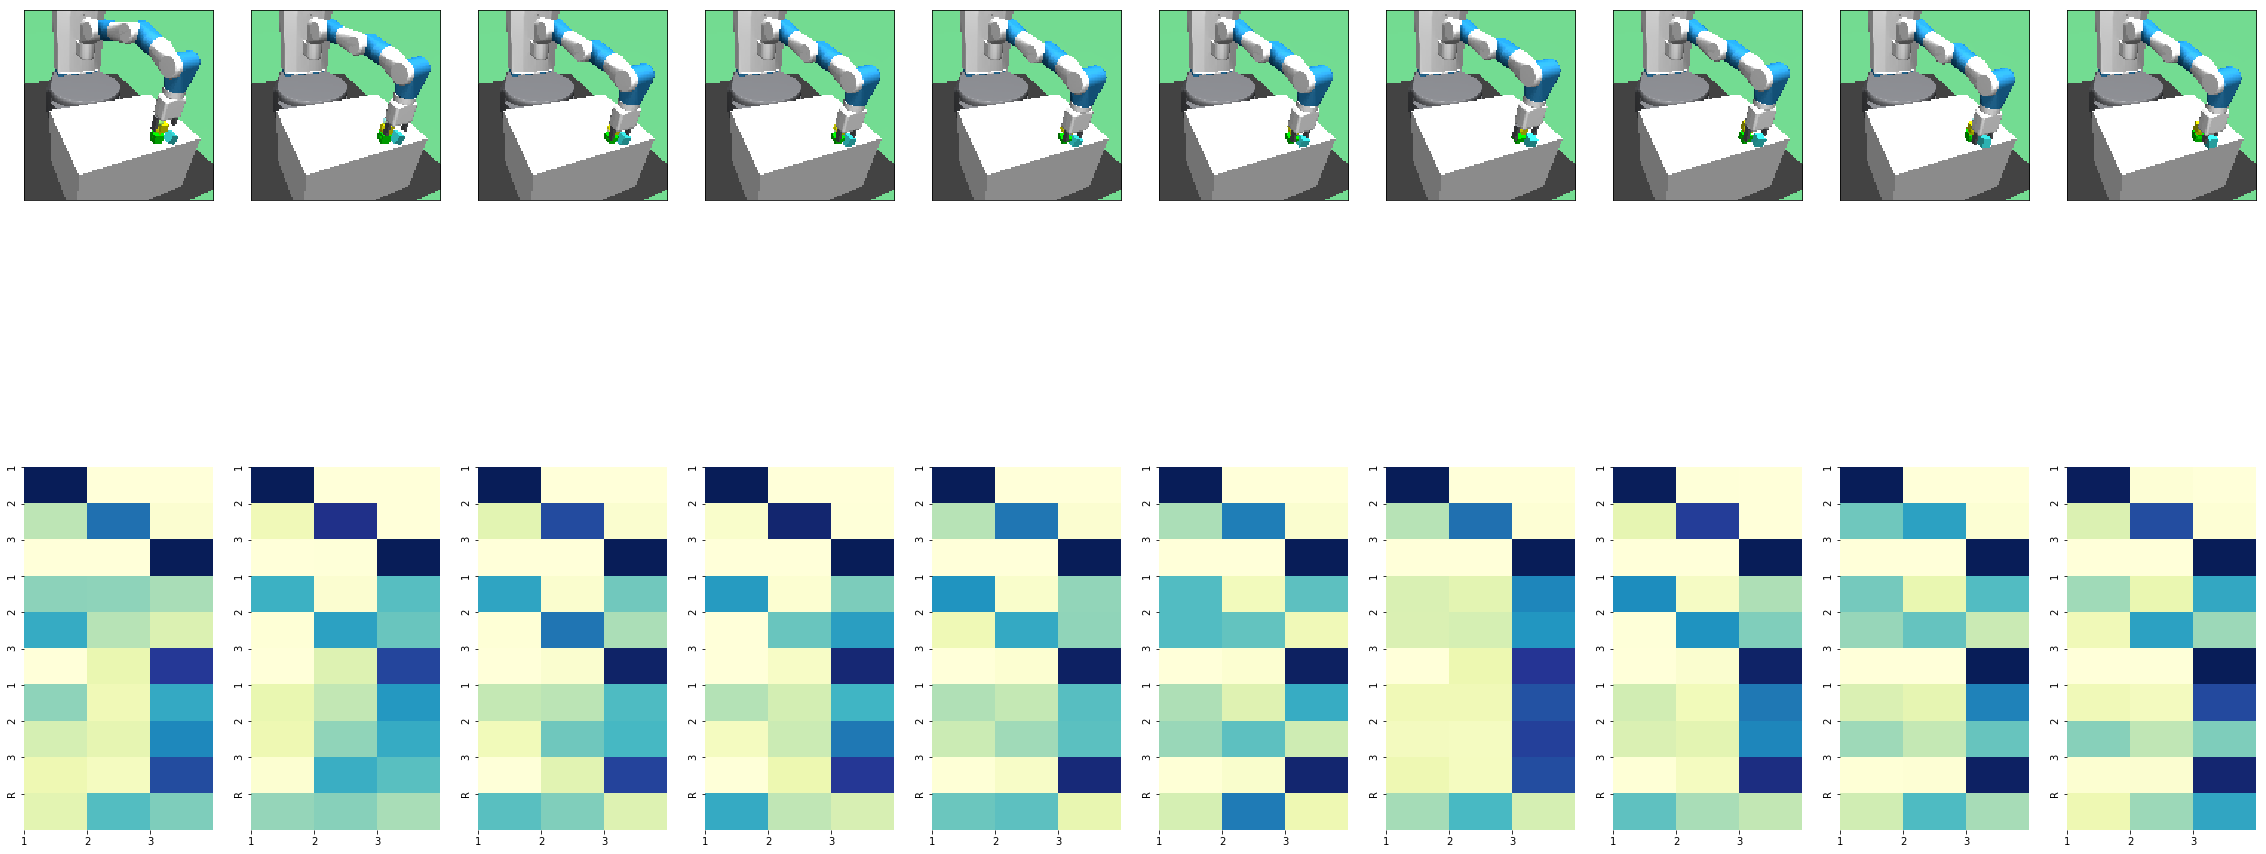

Step start 5


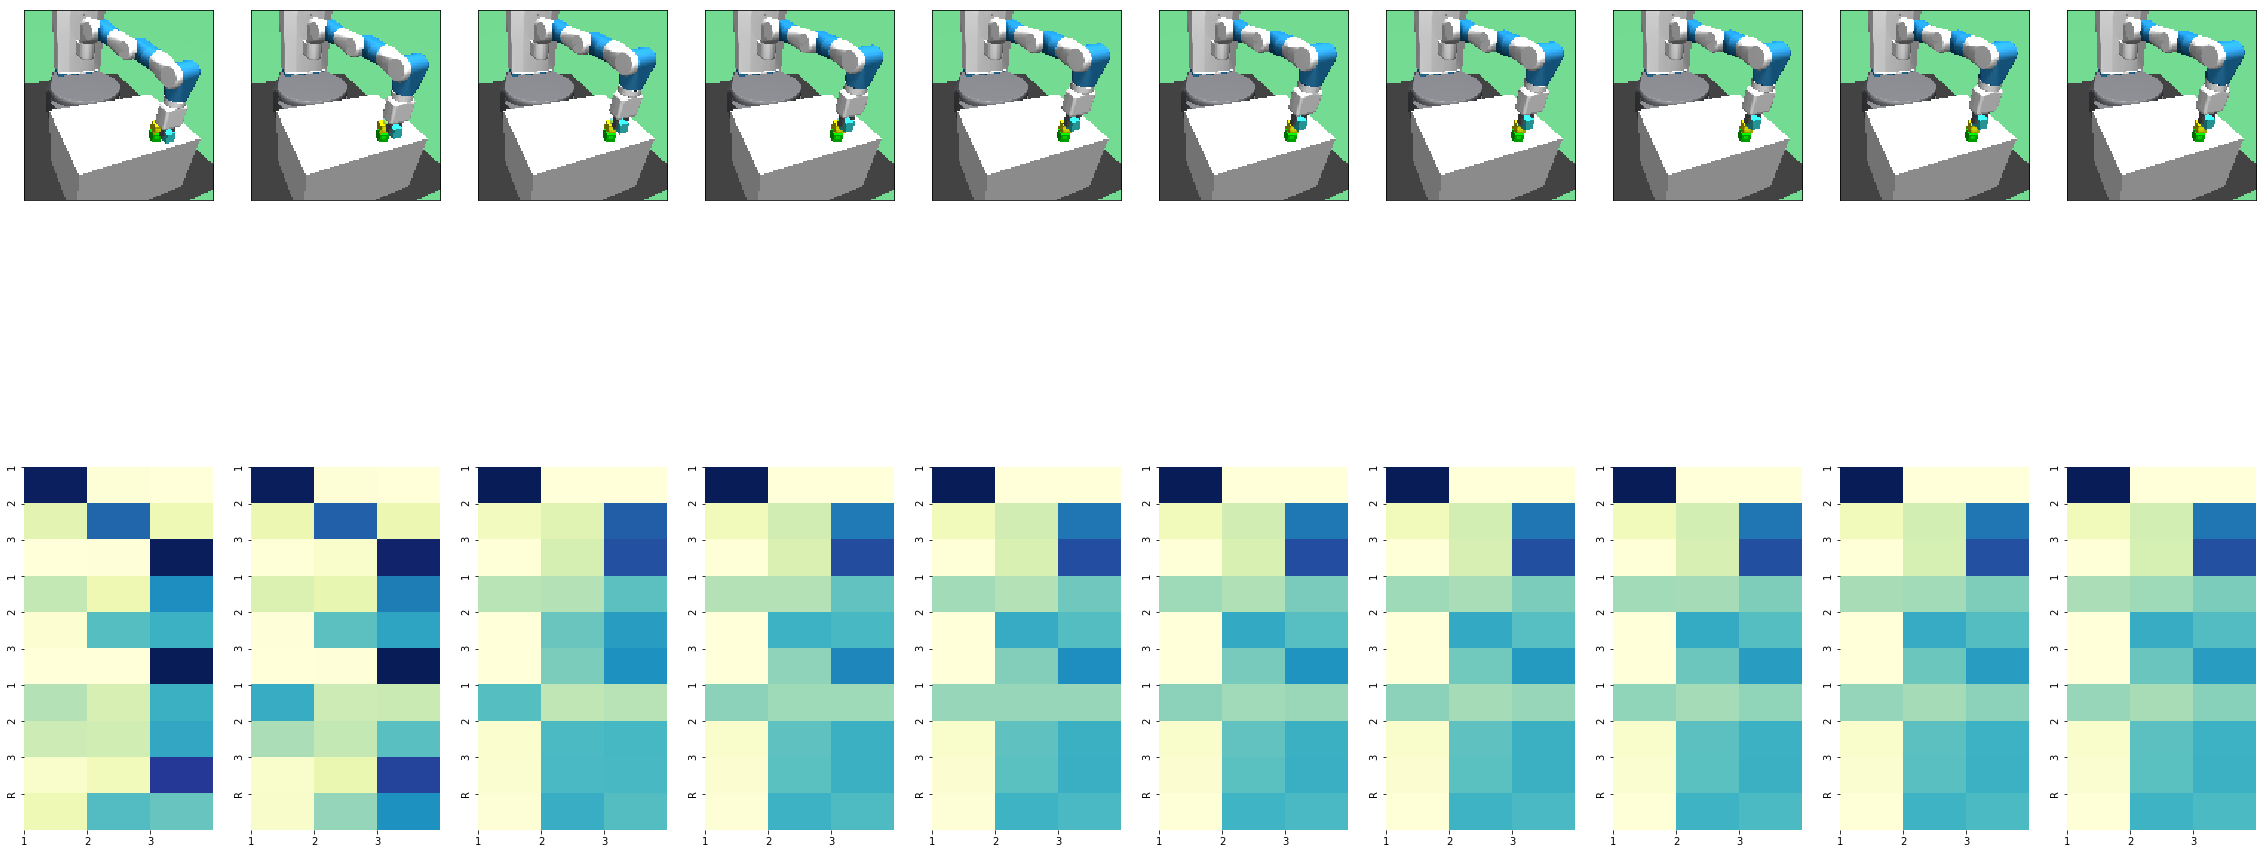

Step start 6


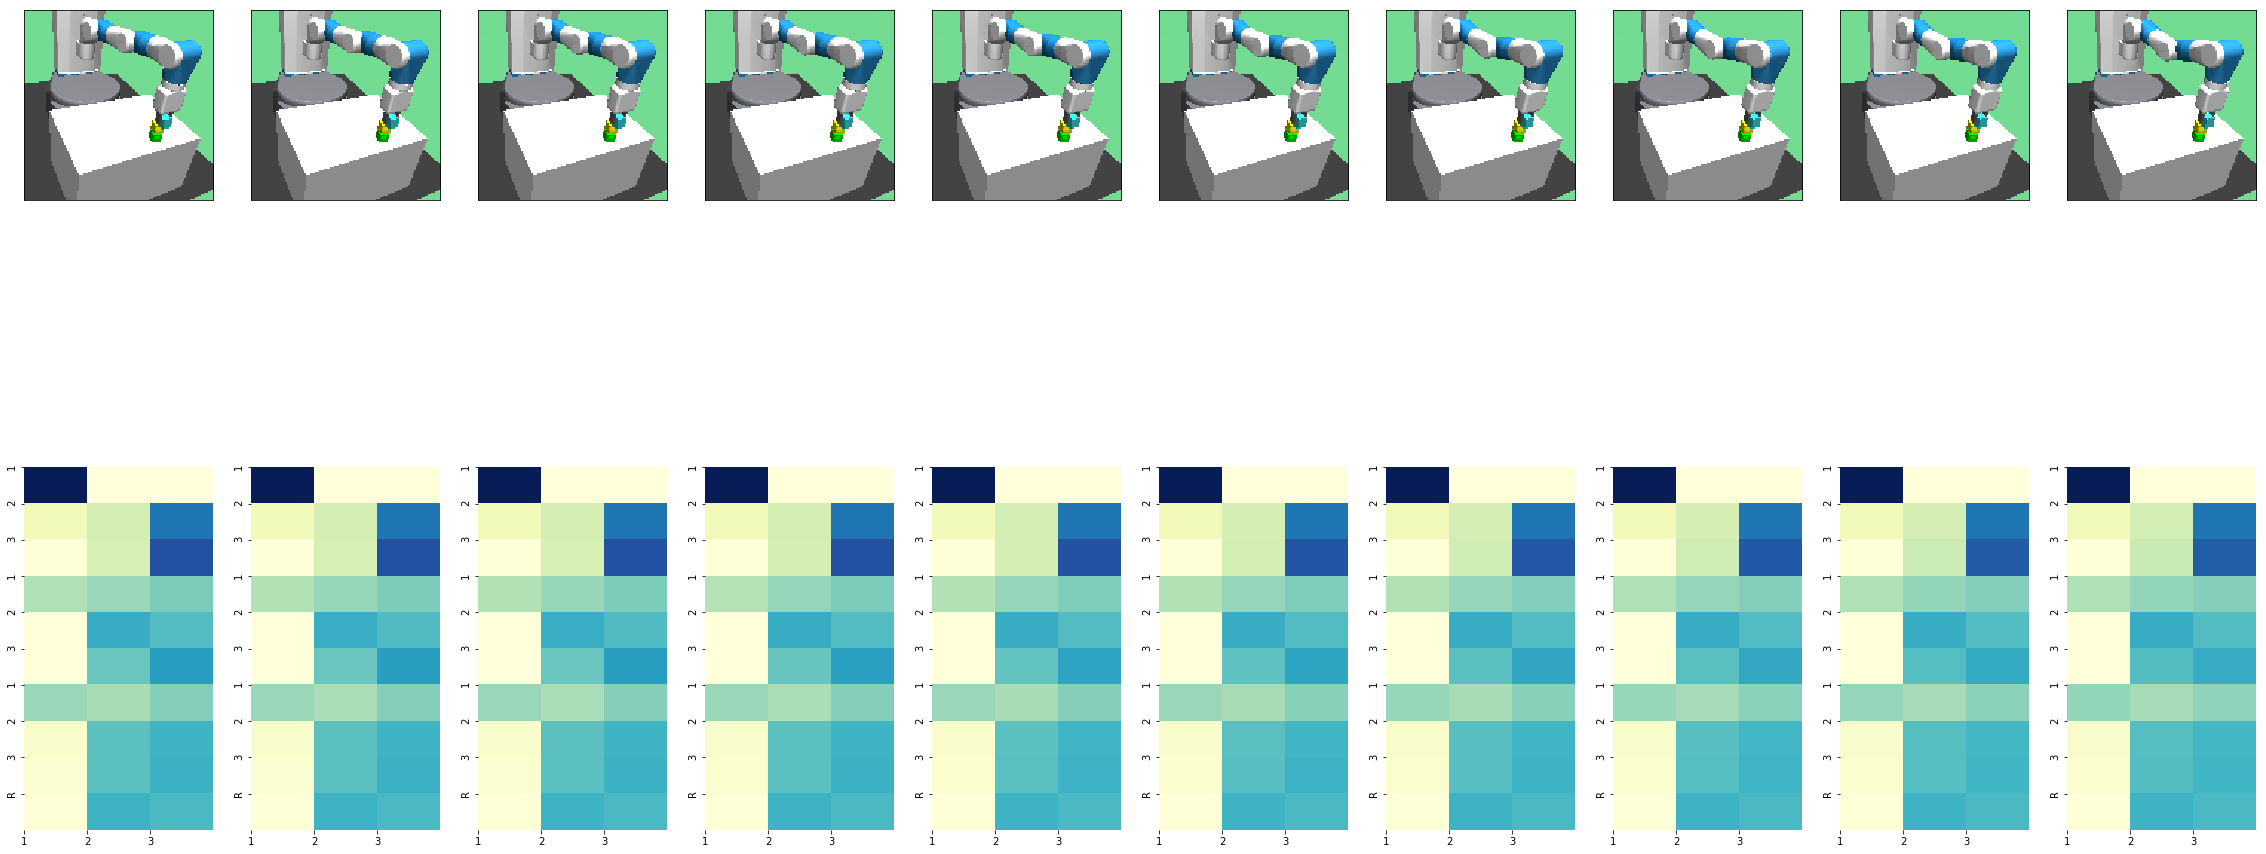

Step start 7


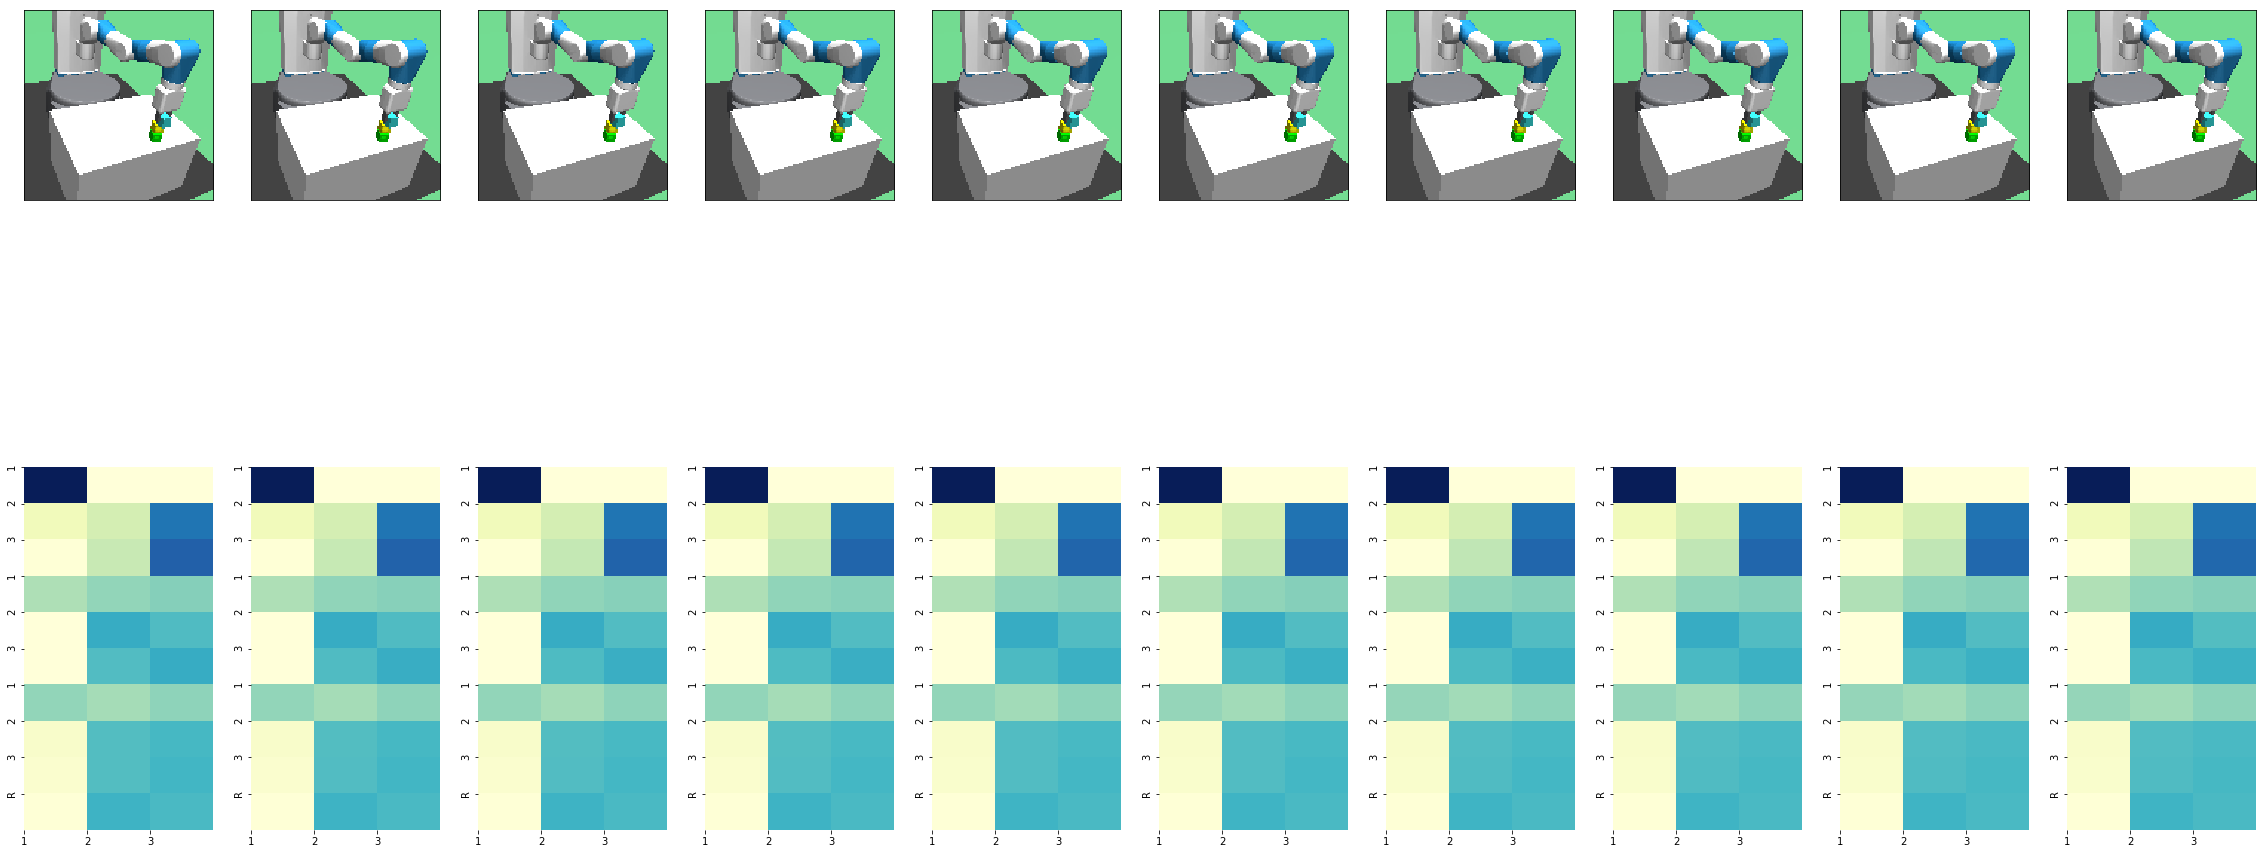

Step start 8


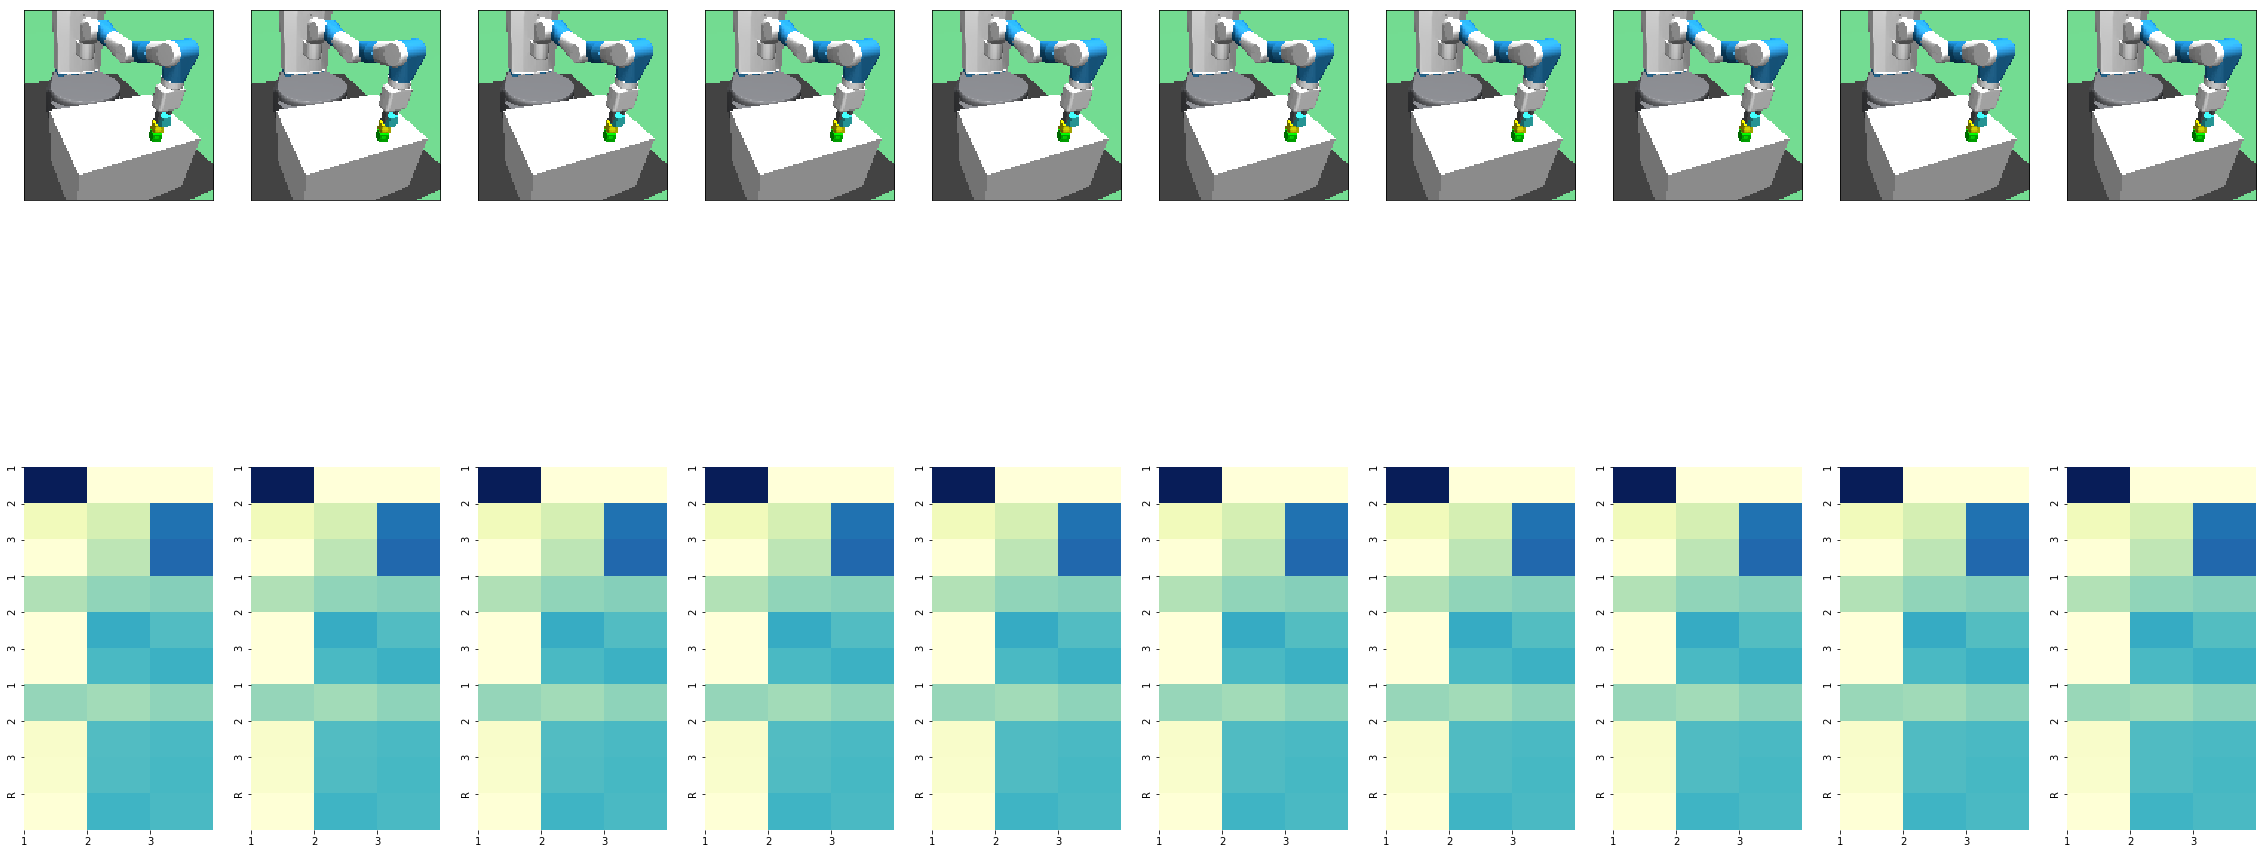

Step start 9


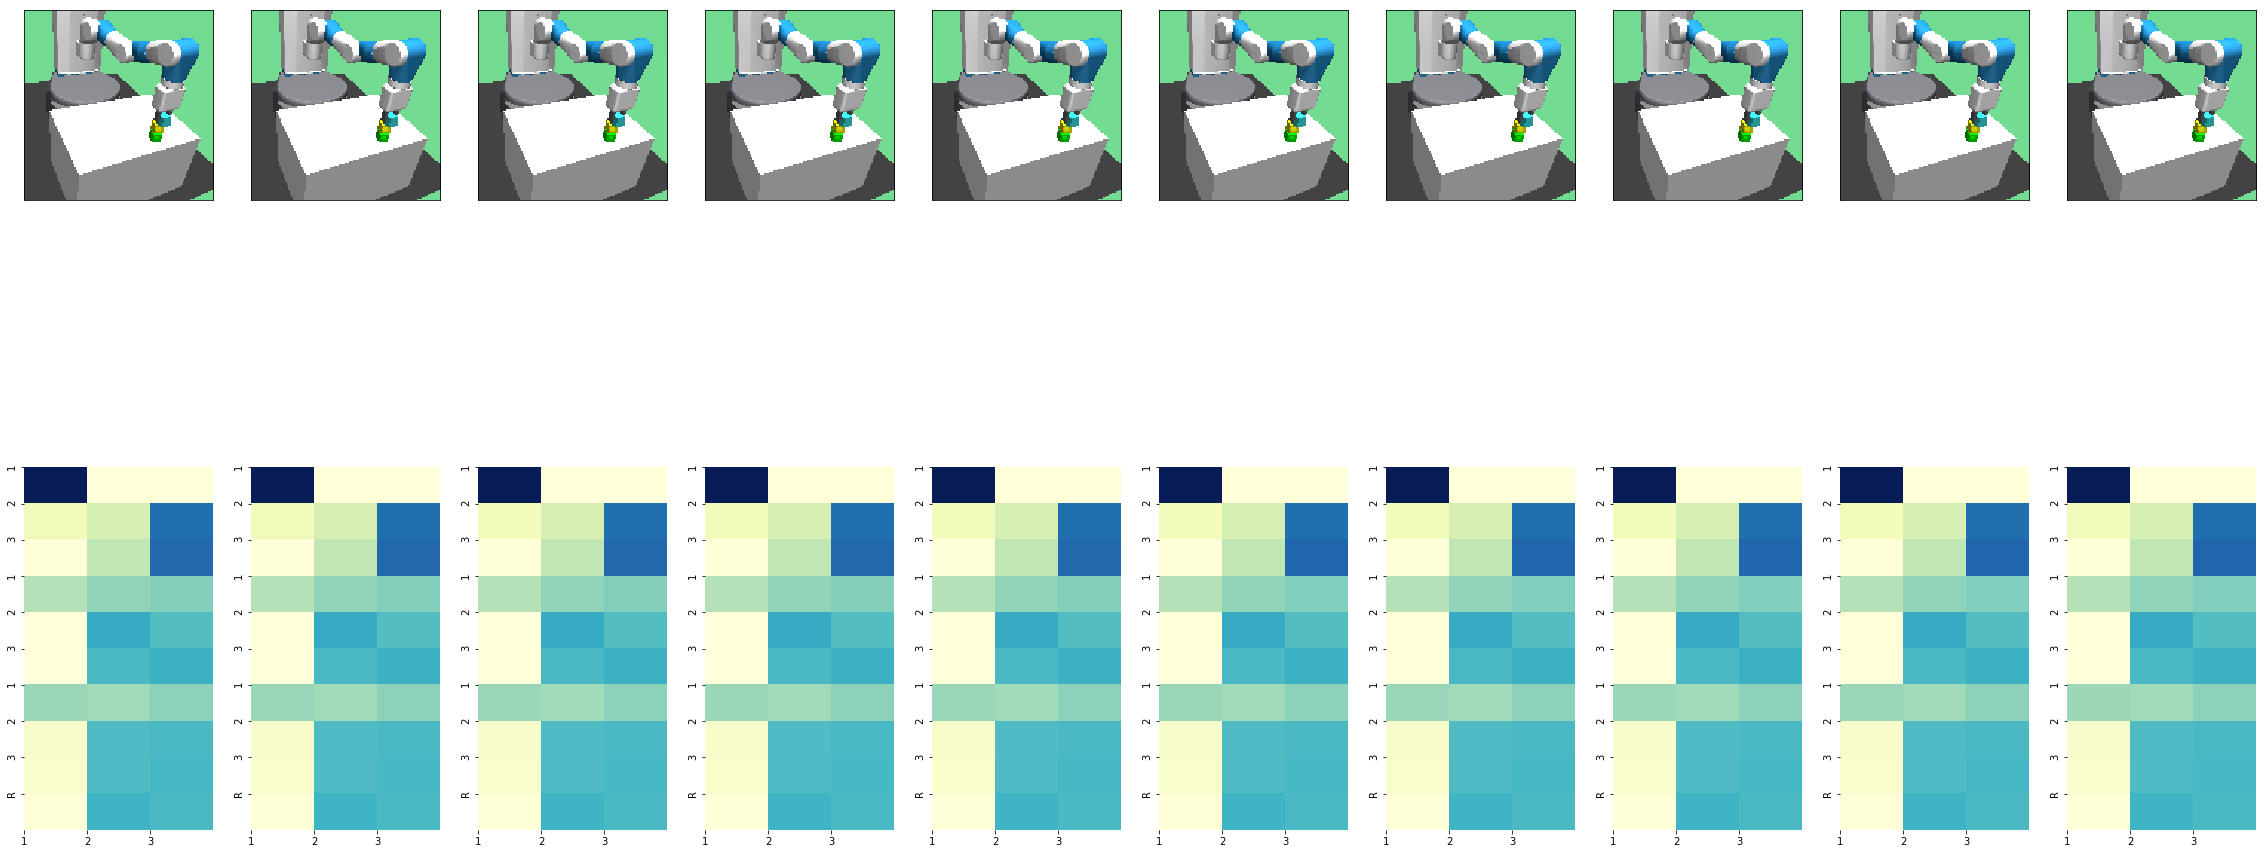

Step start 10


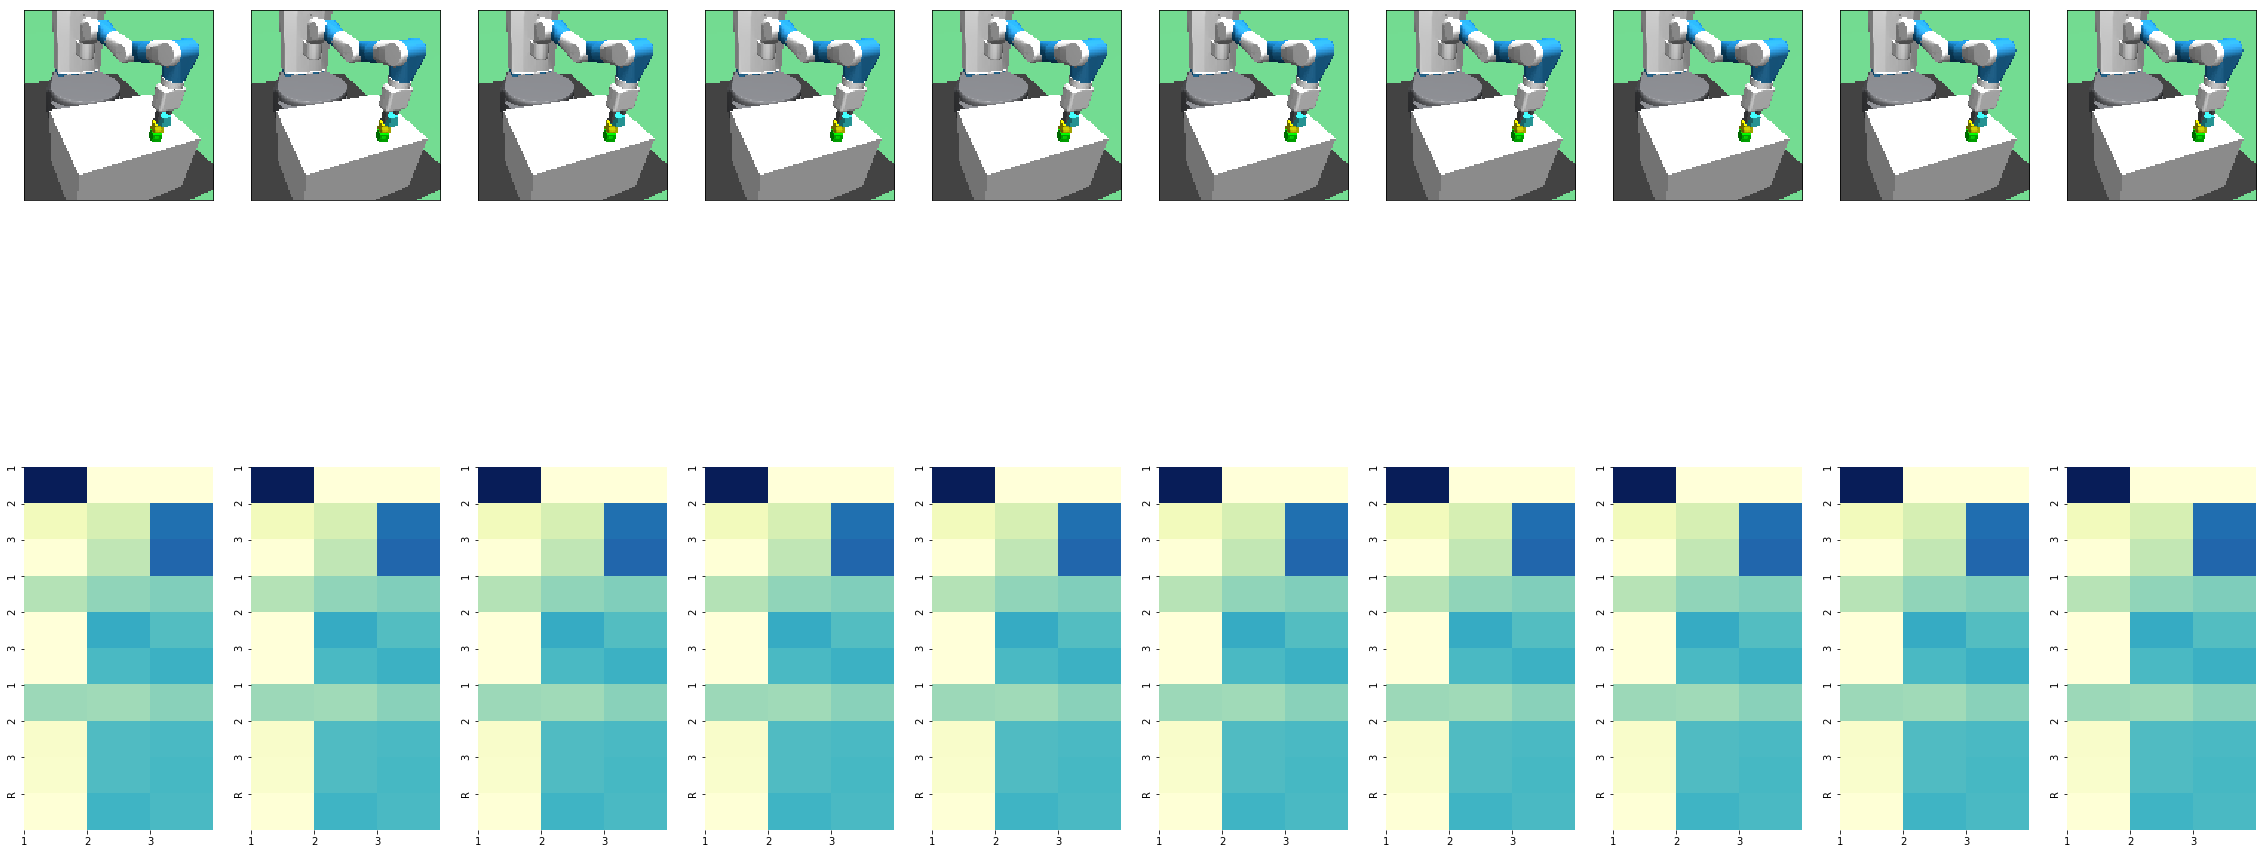

Step start 11


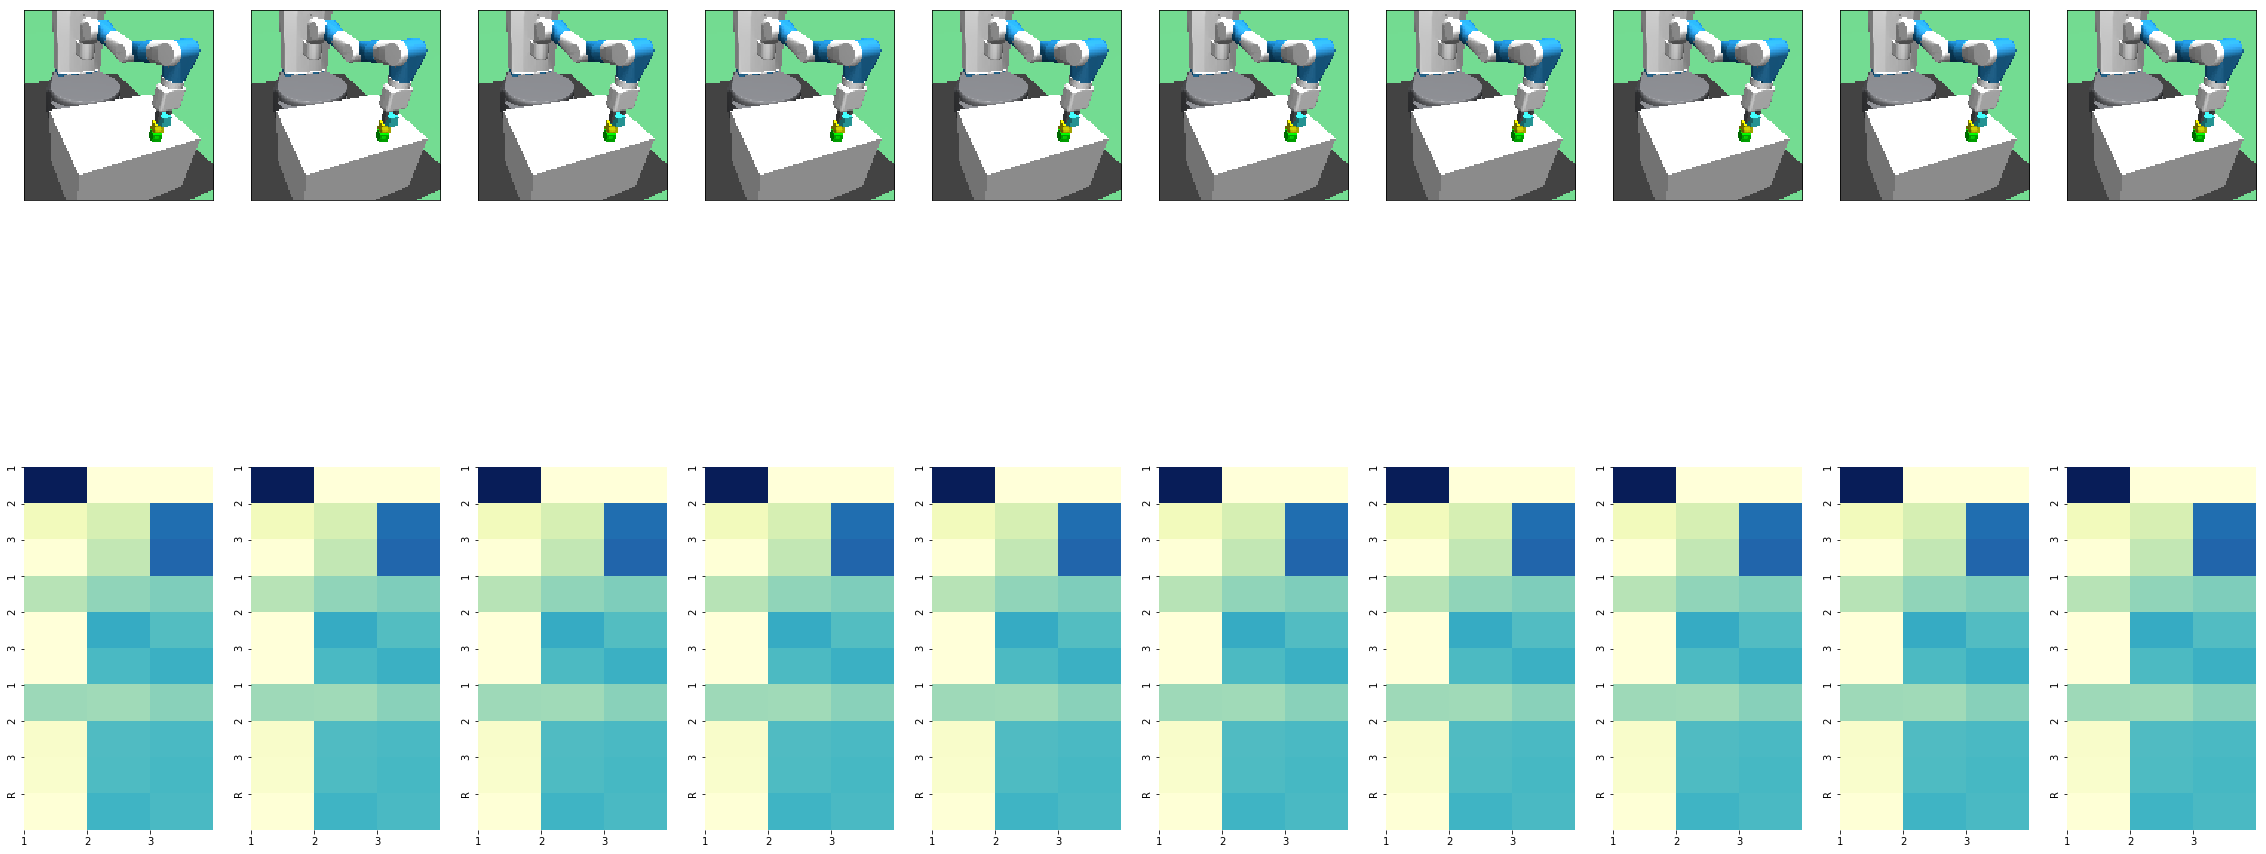

Step start 12


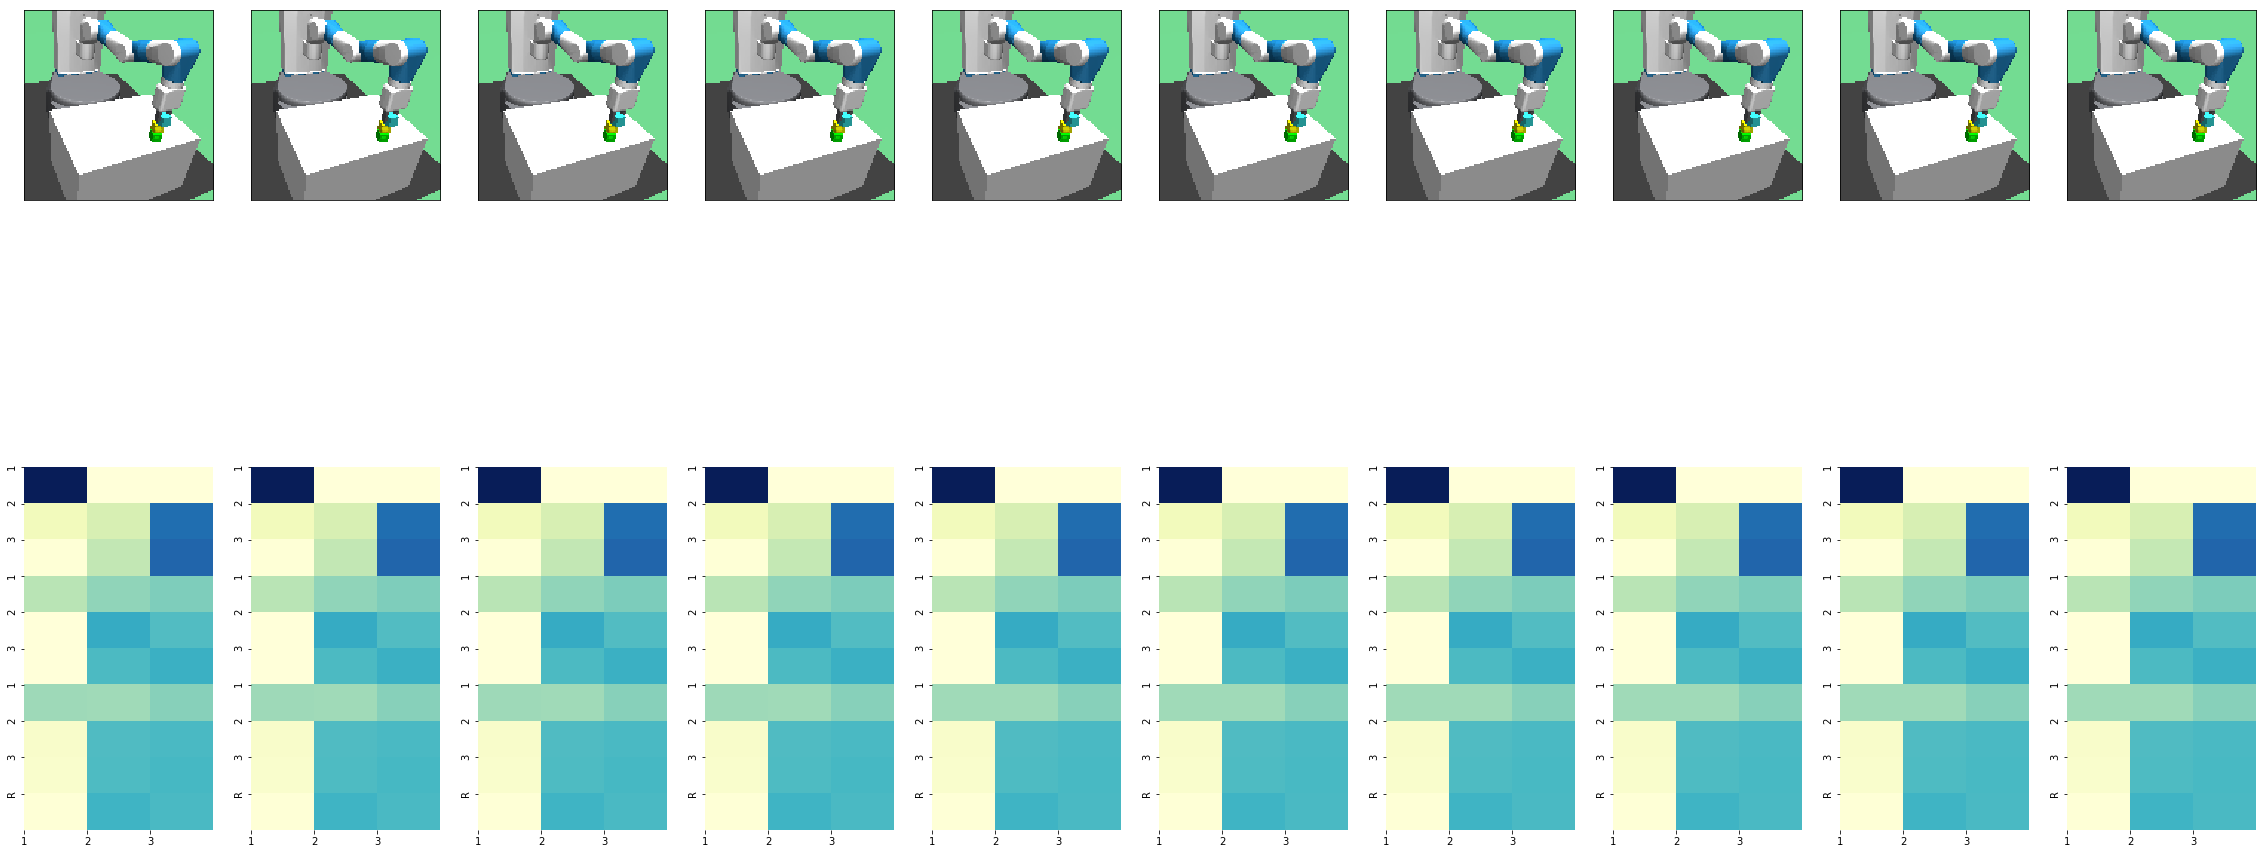

Step start 13


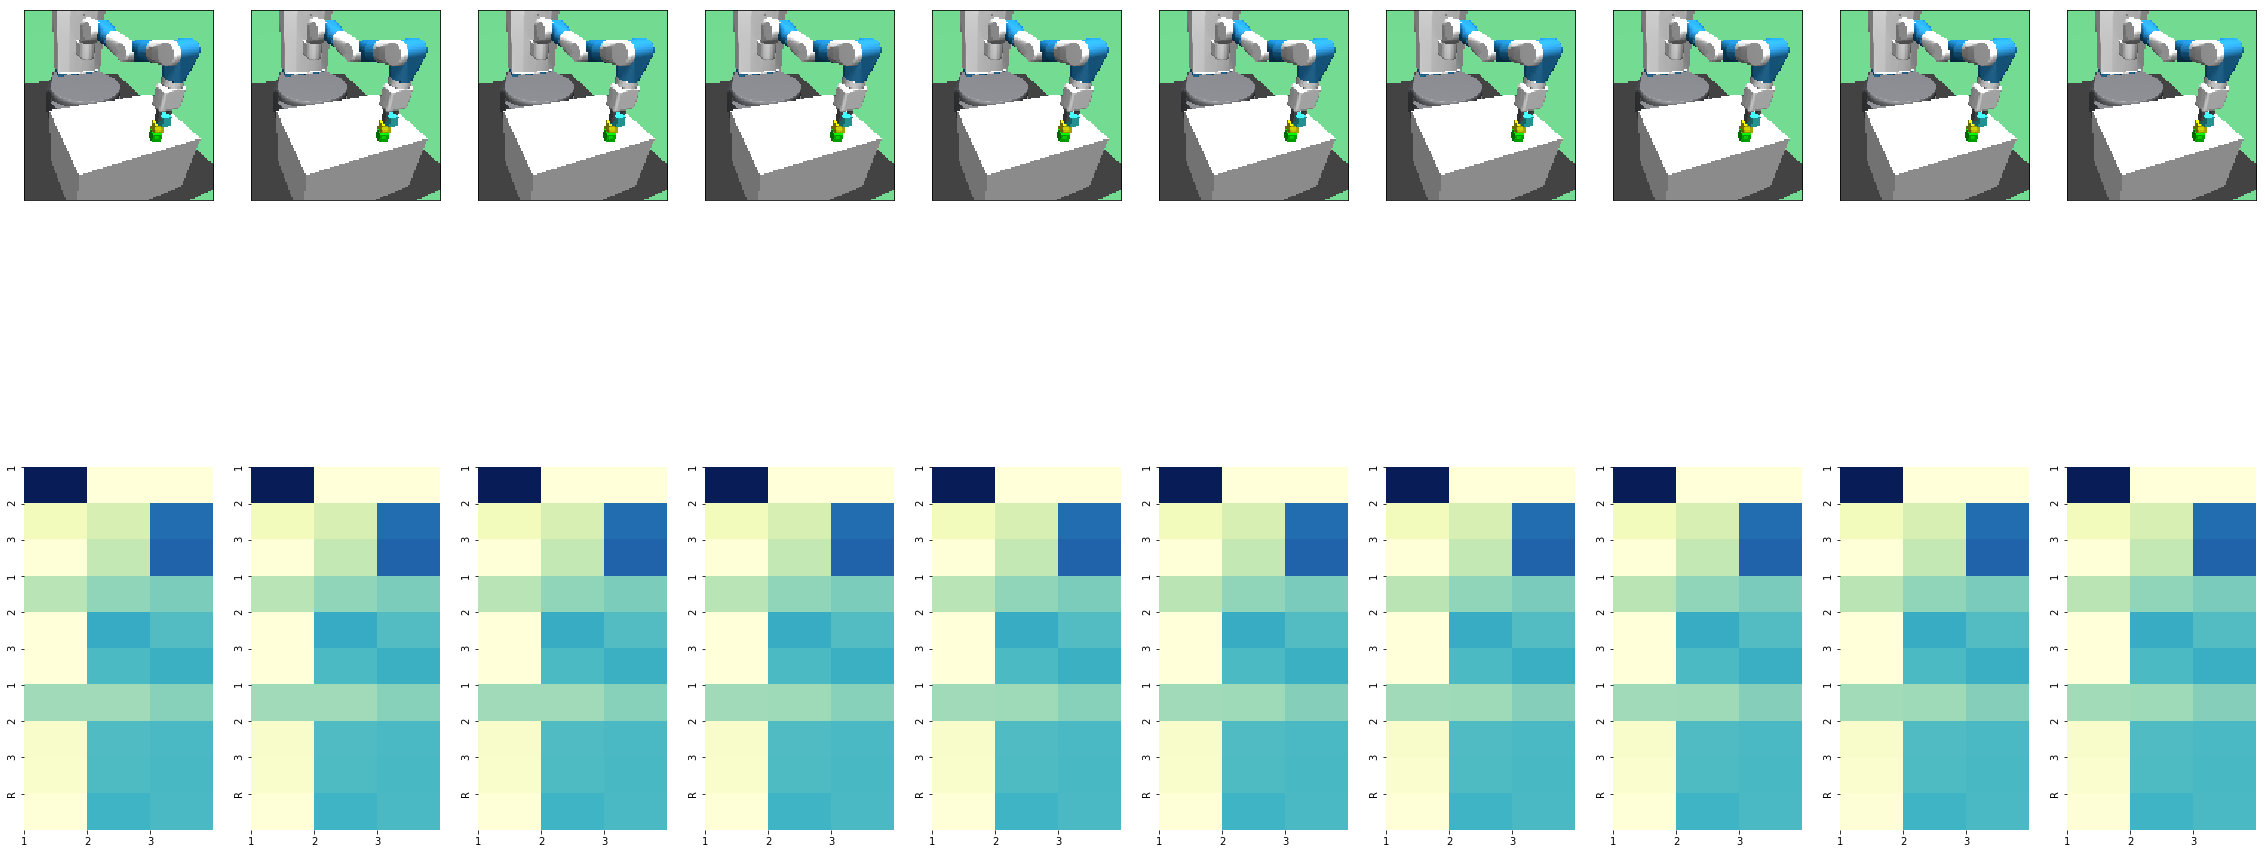

Step start 14


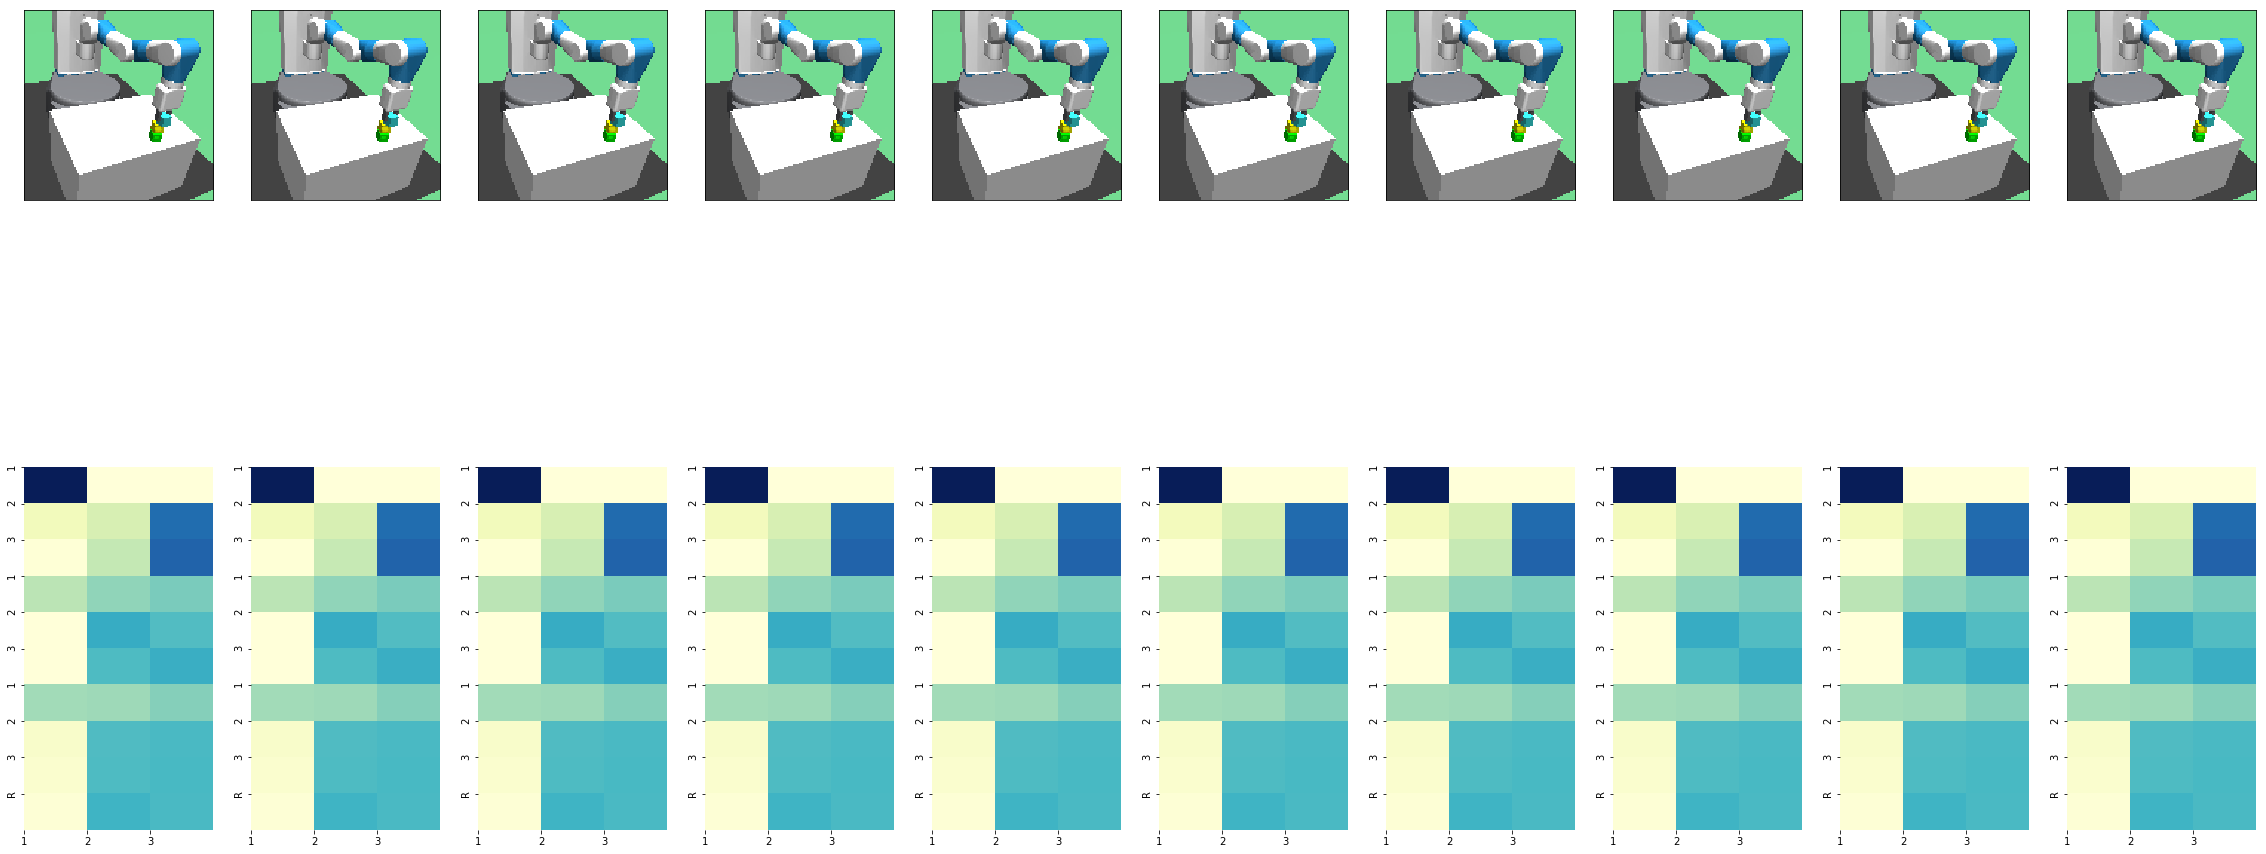

In [65]:
path_len = actions.shape[1]
path_idx = 5 # The trajectory index in the HDF5 file
origin = [0,0,0]
num_blocks = 3
num_heads = 1
num_relational_blocks = 3
num_selection_heads = 1

for step_start in range(path_len//10):
    print(F"Step start {step_start}")
#     f, axs = plt.subplots(nrows=3, ncols=10, figsize=(40, 20), gridspec_kw={'height_ratios':[num_relational_blocks * num_blocks*2,num_relational_blocks * num_blocks, 1], 'width_ratios': np.ones(10)})
    f, axs = plt.subplots(nrows=2, ncols=10, figsize=(40, 20), gridspec_kw={'height_ratios':[num_relational_blocks * num_blocks*2,num_relational_blocks * num_blocks], 'width_ratios': np.ones(10)})

#     f, quiver_axs = plt.subplots(nrows=1, ncols=10, figsize=(40, 3), subplot_kw={'projection': '3d'})
#     f, quiver1_axs = plt.subplots(nrows=1, ncols=10, figsize=(40, 3), subplot_kw={'projection': '3d'})
#     f, quiver2_axs = plt.subplots(nrows=1, ncols=10, figsize=(40, 3), subplot_kw={'projection': '3d'})
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    for env_step in range(step_start*10, step_start*10+10):
        if env_step > path_len:
            break
#             print(F"env_step {env_step}")
        if 'image_obs' in globals():
#             import pdb
#             pdb.set_trace()
            im1 = Image.fromarray(image_obs[path_idx][env_step].astype(np.uint8))
            axs[0, env_step%10].imshow(np.asarray(im1))
        axs[0, env_step%10].set_yticks([])
        axs[0, env_step%10].set_xticks([])
#         axs[0, env_step%10].set_title(F"Policy Attention: \n " + str(attn[path_idx][env_step].shape) + 
#                                    "\n Reward: \n "+str(rewards[path_idx][env_step]) +
#                                   "\n Action: \n" + str(actions[path_idx][env_step][:3]) +
#                                   "\n Grip Action: \n" + str(actions[path_idx][env_step][3]))
#         print(attn[path_idx][env_step][:-1].reshape(num_relational_blocks * num_blocks, num_heads * num_blocks).shape)
#         print(np.equal(attn[path_idx][env_step][:-1].reshape(num_relational_blocks * num_blocks, num_heads * num_blocks)[0], attn[path_idx][env_step][:-1].reshape(num_relational_blocks * num_blocks, num_heads * num_blocks)[1]))
#         yticklabels = np.arange(1, num_relational_blocks*num_blocks+1, 1)
        yticklabels= []
        for i in range(num_relational_blocks):
            for i in range(num_blocks):
                yticklabels.append(i+1)
        yticklabels.append("R")
        rel_im = sns.heatmap(attn[path_idx][env_step].reshape(num_relational_blocks * num_blocks + num_selection_heads, num_heads * num_blocks), cmap="YlGnBu", 
                             ax=axs[1, env_step%10], cbar=False, xticklabels=np.arange(1, (num_blocks+1)*num_heads, 1), yticklabels=yticklabels)
#         rel_im = sns.heatmap(attn[path_idx][env_step][:-1].reshape(num_relational_blocks * num_heads * num_blocks, num_blocks), cmap="YlGnBu", ax=axs[1, env_step%10], cbar=False, xticklabels=np.arange(1, (num_blocks+1)*num_relational_blocks, 1), yticklabels=np.arange(1, num_relational_blocks*num_blocks+2, 1))
#         print(attn[path_idx][env_step][-1].shape)
#         selection_im = sns.heatmap(np.expand_dims(attn[path_idx][env_step][-1], 0), cmap="YlGnBu", ax=axs[2, env_step%10], cbar=False, xticklabels=np.arange(1, num_blocks+1, 1))
#         pos, textvals = plt.yticks()
#         pos[1] += .5
        yticks = axs[1, env_step%10].get_yticks()
        yticks -= .5
#         yticks = np.append(yticks, np.array(31))
        axs[1, env_step%10].set_yticks(yticks)
    
        xticks = axs[1, env_step%10].get_xticks()
        xticks -= .5
        axs[1, env_step%10].set_xticks(xticks)
#         print(F"{yticks} yticks")
#         im = axs[1, env_step%10].imshow(attn[path_idx][env_step], cmap=plt.get_cmap("viridis"), aspect='auto')
#         texts = annotate_heatmap(im, valfmt="{x:.1f}")
#                                   "\n LogPi: \n " + str(logpi[path_idx][env_step]) + 
#                                   "\n logpi_inverteddir: \n" + str(logpi_inverteddir[path_idx][env_step]) +
#                                   "\n logpi_block2: \n " + str(logpi_block2[path_idx][env_step]) + 
#                                   "\n logstd: \n" + str(logstd[path_idx][env_step]) +
#                                   "\n logstd_block2: \n " + str(logstd_block2[path_idx][env_step]))
#         quiver_axs[env_step%10].quiver(*origin, *actions[path_idx][env_step][:3], color=[1,0,0], normalize=True, length=.1)
#         quiver_axs[env_step%10].quiver(*origin, 0, 0, actions[path_idx][env_step][3], color=[0,0,1], normalize=False, length=.05)
#         quiver_axs[env_step%10].set_title("\n qvalues_actual: \n " + str(qvalues[path_idx][env_step]) +
#         "\n Sum qvalues_actual: \n " + str(qvalues[path_idx][env_step].sum()))
#         quiver1_axs[env_step%10].quiver(*origin, *actions[path_idx][env_step][:3], color=[1,0,0], normalize=True, length=.1)
#         quiver1_axs[env_step%10].quiver(*origin, 0, 0, actions[path_idx][env_step][3]*-1, color=[0,0,1], normalize=False, length=.05)
#         quiver1_axs[env_step%10].set_title("\n qvalues_invertedgrip: \n " + str(qvalues_invertedgrip[path_idx][env_step]) +
#         "\n Sum qvalues_invertedgrip: \n " + str(qvalues_invertedgrip[path_idx][env_step].sum()))
        
#         quiver2_axs[env_step%10].quiver(*origin, *actions[path_idx][env_step][:3]*-1, color=[1,0,0], normalize=True, length=.1)
#         quiver2_axs[env_step%10].quiver(*origin, 0, 0, actions[path_idx][env_step][3], color=[0,0,1], normalize=False, length=.05)
#         quiver2_axs[env_step%10].set_title("\n qvalues_inverteddir: \n " + str(qvalues_inverteddir[path_idx][env_step]) +
#         "\n Sum qvalues_inverteddir: \n " + str(qvalues_invertedgrip[path_idx][env_step].sum()))
    plt.show()
    time.sleep(.2)
#     input("Press Enter to continue...")
#     plt.clf()

In [58]:
def produce_diagram(path_idx, step_idxs):
    gridspec_kw_arr = np.ones(len(step_idxs))
    gridspec_kw_arr = np.append(gridspec_kw_arr, np.array(.1))
#     f, axs = plt.subplots(nrows=2, ncols=len(step_idxs) + 1, figsize=(20, 10), gridspec_kw={'width_ratios': gridspec_kw_arr})

    f, axs = plt.subplots(nrows=2, ncols=len(step_idxs)+1, figsize=(40, 20), gridspec_kw={'height_ratios':[num_relational_blocks * num_blocks*4,num_relational_blocks * num_blocks], 'width_ratios': gridspec_kw_arr})
    plt.subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=0, hspace=0)
    
    axs[0, len(step_idxs)].axis('off')
    for plot_idx, env_step in enumerate(step_idxs):
        im1 = Image.fromarray(image_obs[path_idx][env_step].astype(np.uint8))
        axs[0, plot_idx].imshow(np.asarray(im1))
        axs[0, plot_idx].set_yticks([])
        axs[0, plot_idx].set_xticks([])
        
        yticklabels= []
        for i in range(num_relational_blocks):
            for i in range(num_blocks):
                yticklabels.append(i+1)
        yticklabels.append("R")
        
        hm = sns.heatmap(attn[path_idx][env_step].reshape(num_relational_blocks * num_blocks + num_selection_heads, num_heads * num_blocks), yticklabels=yticklabels, cmap="YlGnBu", ax=axs[1, plot_idx], 
                         cbar=True if plot_idx == 6 else False, cbar_ax=axs[1, plot_idx+1] if plot_idx == len(step_idxs)-1 else None)
        axs[1, plot_idx].margins(x=1)
        yticks = axs[1, plot_idx].get_yticks()
        yticks -= .5
        
        if plot_idx == 0:
            axs[1, plot_idx].set_yticks(yticks)
        else:
            axs[1, plot_idx].set_yticks([])

        xticks = axs[1, plot_idx].get_xticks()
        xticks -= .5
        axs[1, plot_idx].set_xticks(xticks)
    f.tight_layout()
    plt.show()
    time.sleep(.2)
    return f

In [191]:
def produce_attn(path_idx, step_idxs, done_idx=7, ticksize=10):
    gridspec_kw_arr = np.ones(len(step_idxs))*2
    gridspec_kw_arr = np.append(gridspec_kw_arr, np.array(.1))
#     f, axs = plt.subplots(nrows=2, ncols=len(step_idxs) + 1, figsize=(20, 10), gridspec_kw={'width_ratios': gridspec_kw_arr})
    # +1 is for the cbar
    f, axs = plt.subplots(nrows=1, ncols=len(step_idxs)+1, figsize=(40-(4*3), 10), gridspec_kw={'height_ratios':[1], 'width_ratios': gridspec_kw_arr})
    plt.subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=0, hspace=0)
    
    for plot_idx, env_step in enumerate(step_idxs):        
        yticklabels= []
        for i in range(num_relational_blocks):
            for i in range(num_blocks):
                yticklabels.append(i+1)
        yticklabels.append("R")
        
#         hm = sns.heatmap(attn[path_idx][env_step].reshape(num_relational_blocks * num_blocks + num_selection_heads, num_heads * num_blocks), yticklabels=yticklabels, cmap="YlGnBu", ax=axs[plot_idx], 
#                          cbar=True if plot_idx == done_idx else False, cbar_ax=axs[plot_idx+1] if plot_idx == len(step_idxs)-1 else None)
        hm = sns.heatmap(attn[path_idx][env_step].reshape(num_relational_blocks * num_blocks + num_selection_heads, num_heads * num_blocks), xticklabels=np.arange(1, (num_blocks+1)*num_heads, 1), yticklabels=yticklabels, cmap="YlGnBu", ax=axs[plot_idx], 
                         cbar=True, cbar_ax=axs[len(step_idxs)])
    
        axs[plot_idx].margins(x=1)
        yticks = axs[plot_idx].get_yticks()
        yticks -= .5
        
        if plot_idx == 0:
            axs[plot_idx].set_yticks(yticks)
            axs[plot_idx].tick_params(axis='y', labelsize=ticksize)
            axs[len(step_idxs)].tick_params(axis='y', labelsize=ticksize)
        else:
            axs[plot_idx].set_yticks([])

        xticks = axs[plot_idx].get_xticks()
        xticks -= .5
        axs[plot_idx].set_xticks(xticks, )
        axs[plot_idx].tick_params(axis='x', labelsize=ticksize)
    f.tight_layout()
    plt.show()
    time.sleep(.2)
    return f, axs
def produce_attn(path_idx, step_idxs, done_idx=7, ticksize=14):
    gridspec_kw_arr = np.ones(len(step_idxs))*2
    gridspec_kw_arr = np.append(gridspec_kw_arr, np.array(.2))
#     f, axs = plt.subplots(nrows=2, ncols=len(step_idxs) + 1, figsize=(20, 10), gridspec_kw={'width_ratios': gridspec_kw_arr})
    # +1 is for the cbar
#     f, axs = plt.subplots(nrows=1, ncols=len(step_idxs), figsize=(30, 20), gridspec_kw={'height_ratios':[1], 'width_ratios': gridspec_kw_arr})
    f, axs = plt.subplots(nrows=1, ncols=len(step_idxs)+1, figsize=(46, 6), gridspec_kw={'height_ratios':[1], 'width_ratios': gridspec_kw_arr})
#     plt.subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=0, hspace=0)
    
    for plot_idx, env_step in enumerate(step_idxs):        
        yticklabels= []
        for i in range(1):
            for i in range(num_blocks):
                yticklabels.append(i+1)
#         yticklabels.append("R")
        
#         hm = sns.heatmap(attn[path_idx][env_step].reshape(num_relational_blocks * num_blocks + num_selection_heads, num_heads * num_blocks), yticklabels=yticklabels, cmap="YlGnBu", ax=axs[plot_idx], 
#                          cbar=True if plot_idx == done_idx else False, cbar_ax=axs[plot_idx+1] if plot_idx == len(step_idxs)-1 else None)
        hm = sns.heatmap(attn[path_idx][env_step].reshape(num_relational_blocks * num_blocks + num_selection_heads, num_heads * num_blocks)[12:18], xticklabels=np.arange(1, (num_blocks+1)*num_heads, 1), yticklabels=yticklabels, cmap="YlGnBu", ax=axs[plot_idx], 
                         cbar=True if plot_idx == 0 else False, cbar_ax=axs[7])
    
#         axs[plot_idx].margins(x=1)
        yticks = axs[plot_idx].get_yticks()
        yticks -= .5
        
        if plot_idx == 0:
            axs[plot_idx].set_yticks(yticks)
            axs[plot_idx].tick_params(axis='y', labelsize=ticksize)
            
            axs[len(step_idxs)].tick_params(axis='y', labelsize=ticksize)
            yt = axs[len(step_idxs)].get_yticklabels()
            
            zt = axs[len(step_idxs)].get_yticks()
            zt -= .5
            print(yt)
            ls = [0.0, .2, .4, .6, .8, 1.0]
            axs[len(step_idxs)].set_yticklabels(ls)
        else:
            axs[plot_idx].set_yticks([])

        xticks = axs[plot_idx].get_xticks()
#         xticks -= .5
        axs[plot_idx].set_xticks(xticks)
#         axs[plot_idx].axis('equal')
        axs[plot_idx].tick_params(axis='x', labelsize=ticksize)
#     f.tight_layout()
    plt.show()
    time.sleep(.2)
    return f, axs

<a list of 6 Text yticklabel objects>


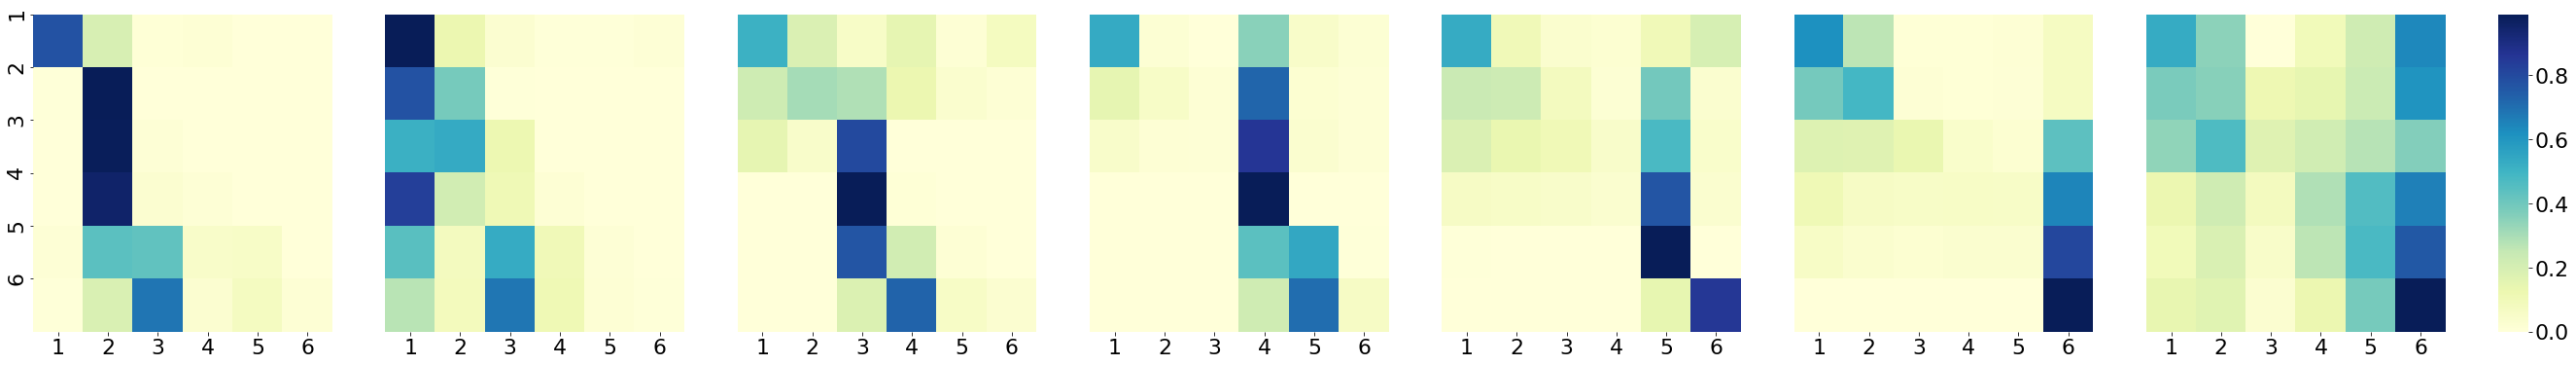

In [192]:
path_idx = 1
step_idxs = [4, 11, 24, 35, 51, 73, 110]

f, axs = produce_attn(path_idx, step_idxs, ticksize=22)

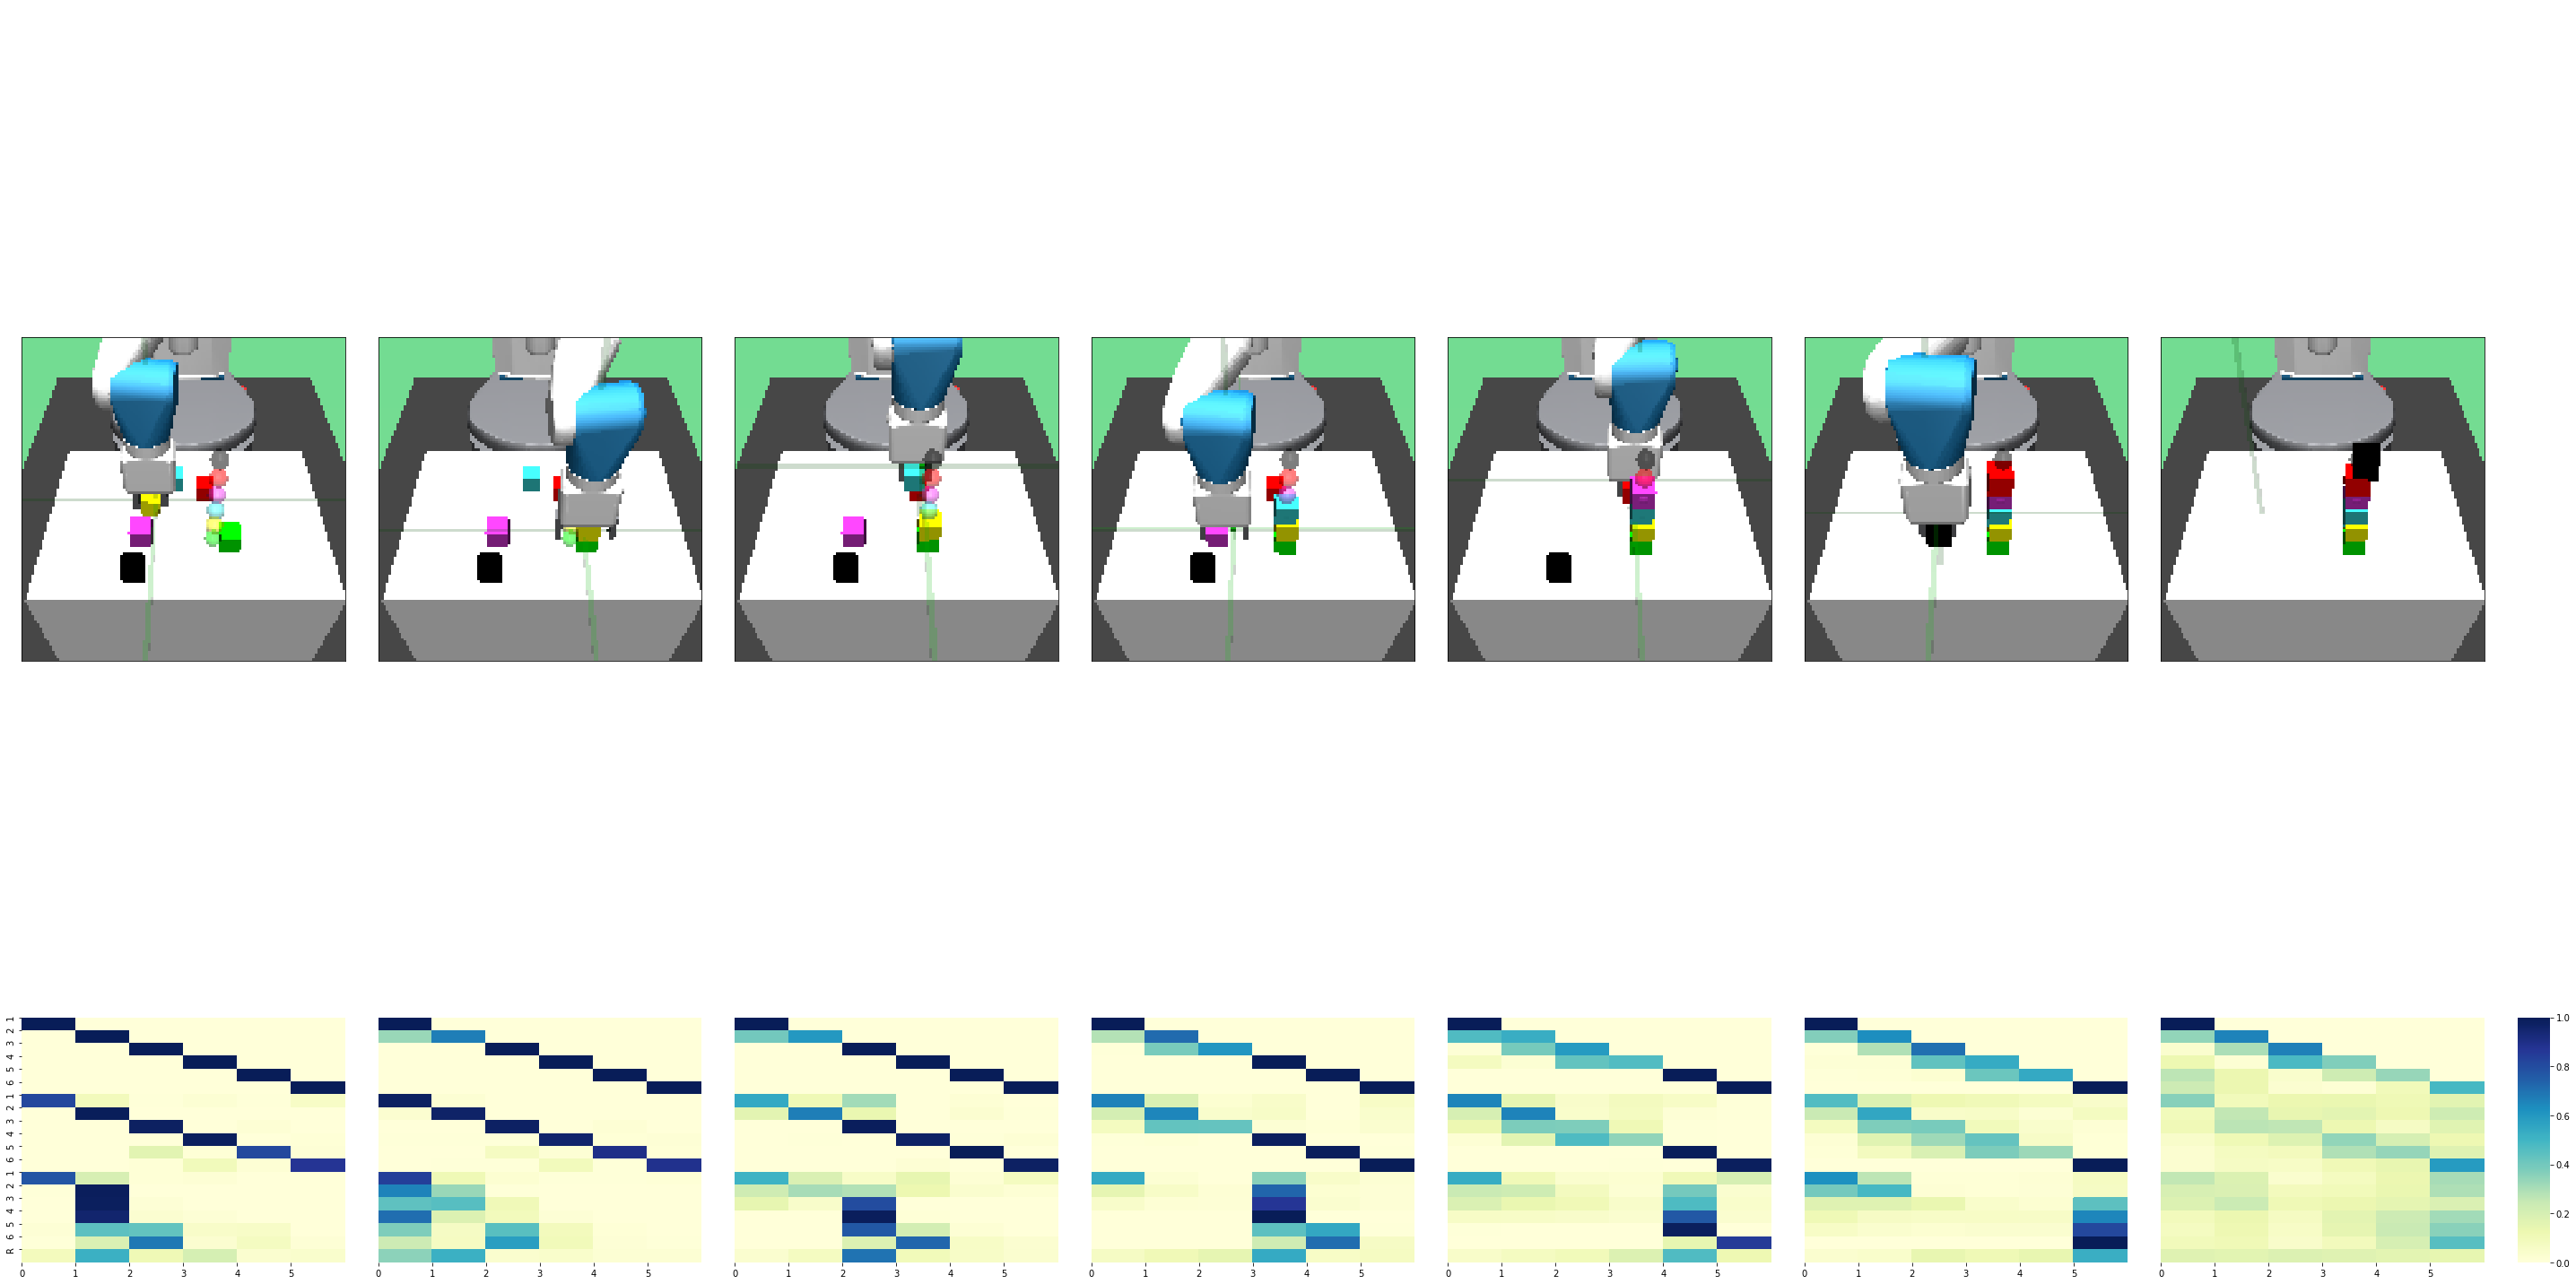

In [194]:
path_idx = 1
step_idxs = [4, 11, 24, 35, 51, 73, 110]

f = produce_diagram(path_idx, step_idxs)

<a list of 6 Text yticklabel objects>


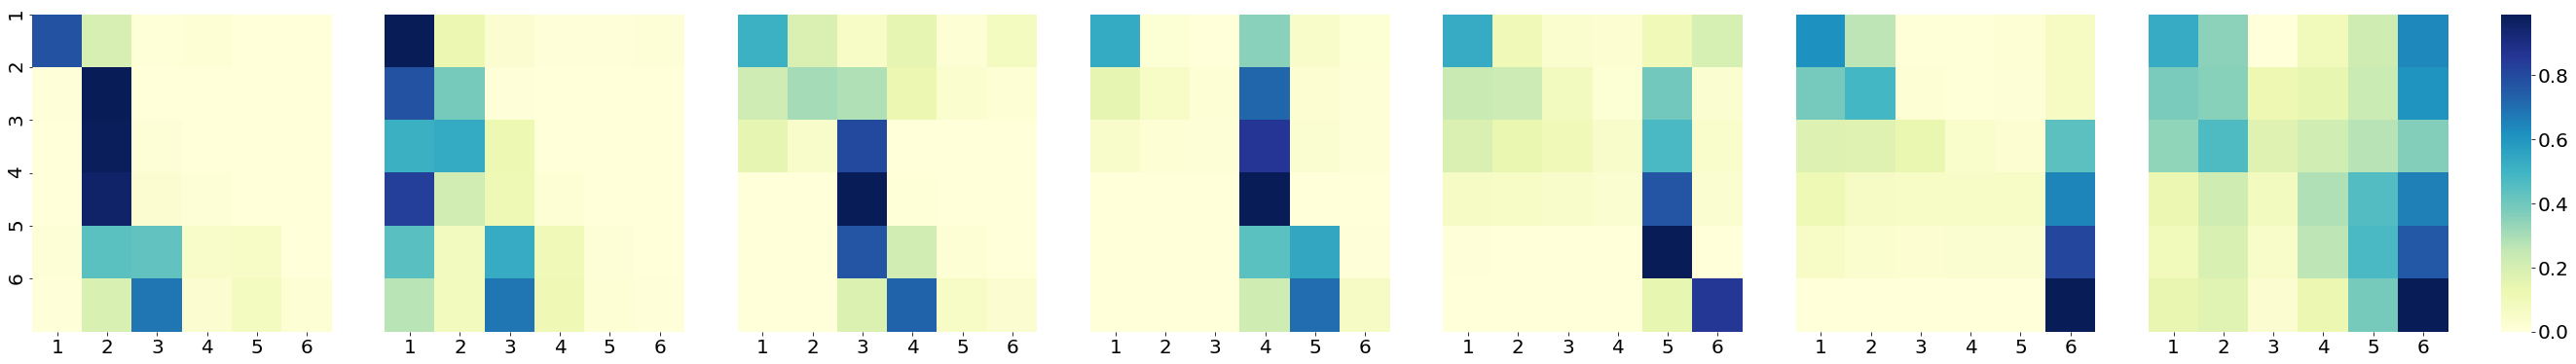

In [193]:
path_idx = 1
step_idxs = [4, 11, 24, 35, 51, 73, 110]

f, axs = produce_attn(path_idx, step_idxs, ticksize=20)
# f.gca().set_xticklabels(x_ticks, rotation=0, fontsize=8)


# f.savefig("attention_diagram.png")

In [ ]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))